In [1]:
!pip install backtesting
!pip install autots
!pip install -U finance-datareader
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=4056abcba0ba7f661fd74f56f67030d174820fcccb97ba18878bbfd75af918bc
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 818.2/818.2 kB 5.1 MB/s eta 0:00:00
--2023-12-29 00:57:35--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-29 00:57:36--  http://downloads.sou

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

#Plotly
import plotly.graph_objects as go

#Seaborn
import seaborn as sns
sns.set(rc={'figure.figsize': (10,6)})
custom_colors = ["#41AEF0",'#FSA262','#34EB0E','#DA94F5', "F5372B","EB9B2D"]

#Matplotlib
import matplotlib.pyplot as plt

#NetworksX
import networkx as nx

#Backtesting
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

#AutoTS
from autots import AutoTS

#FinanceDataReader
import FinanceDataReader as fdr

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


In [ ]:
  # 차트 설정
  plt.rcParams["font.family"] = "AppleGothic"
  plt.rcParams['font.size'] = 20
  plt.rcParams['xtick.labelsize'] = 11
  plt.rcParams['ytick.labelsize'] = 11
  plt.rcParams['axes.labelsize'] = 15

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 불러우기
df = pd.read_csv("/content/drive/MyDrive/학교/cos.csv")

df['Close'] = df['Close'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Change'] = df['Change'].str.replace('%', '').astype(float)
df['Change'] = df['Change'] / 100

df.head(5)

,Date,Close,Open,High,Low,Volume,Change
0,2023-10-30,561.0,571.0,578.0,554,0.00K,-0.0209
1,2023-10-29,573.0,573.0,573.0,573,NaN,0.0000
2,2023-10-27,573.0,607.0,625.0,570,2.10M,-0.0545
3,2023-10-26,606.0,655.0,678.0,600,4.98M,-0.0706
4,2023-10-25,652.0,586.0,718.0,572,13.94M,0.1032


In [ ]:
df.tail(5)

,Date,Close,Open,High,Low,Volume,Change
2416,2014-03-21,4210.0,4255.0,4255.0,"4,175",14.79K,-0.0024
2417,2014-03-20,4220.0,4165.0,4230.0,"4,165",13.02K,0.0048
2418,2014-03-19,4200.0,4195.0,4245.0,"4,100",36.76K,0.0133
2419,2014-03-18,4145.0,4130.0,4205.0,"4,075",17.69K,0.0110
2420,2014-03-17,4100.0,4275.0,4275.0,"4,050",48.56K,-0.0238


In [ ]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2421 non-null   object 
 1   Close   2421 non-null   float64
 2   Open    2421 non-null   float64
 3   High    2421 non-null   float64
 4   Low     2421 non-null   object 
 5   Volume  2335 non-null   object 
 6   Change  2421 non-null   float64
dtypes: float64(4), object(3)
memory usage: 132.5+ KB


In [ ]:
  df.isna().sum()

Date       0
Close      0
Open       0
High       0
Low        0
Volume    86
Change     0
dtype: int64

In [ ]:
#Date(object)에서 날짜(datetime)으로 바꾸기
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format = True, format = '%y-%m-%d')
df.sort_values(by = 'Date', inplace = True)
df.head()

,Date,Close,Open,High,Low,Volume,Change
2420,2014-03-17,4100.0,4275.0,4275.0,"4,050",48.56K,-0.0238
2419,2014-03-18,4145.0,4130.0,4205.0,"4,075",17.69K,0.0110
2418,2014-03-19,4200.0,4195.0,4245.0,"4,100",36.76K,0.0133
2417,2014-03-20,4220.0,4165.0,4230.0,"4,165",13.02K,0.0048
2416,2014-03-21,4210.0,4255.0,4255.0,"4,175",14.79K,-0.0024


In [ ]:
#Histplot,Boxplot,Violinplot으로 close, open, high, low, volume의 분포 비교하기
def three_plots(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    sns.histplot(data = df, x = x, kde = True, ax = ax[0],color = c ).set_title('Histogram + KDE')
    sns.boxplot(data = df, x = x, ax = ax[1],color = c).set_title('Boxplot')
    sns.violinplot(data = df, x = x, ax = ax[2],color = c).set_title('Violin plot')
    fig.suptitle(title, fontsize=30)
    plt.tight_layout(pad=3.0)
    plt.show()

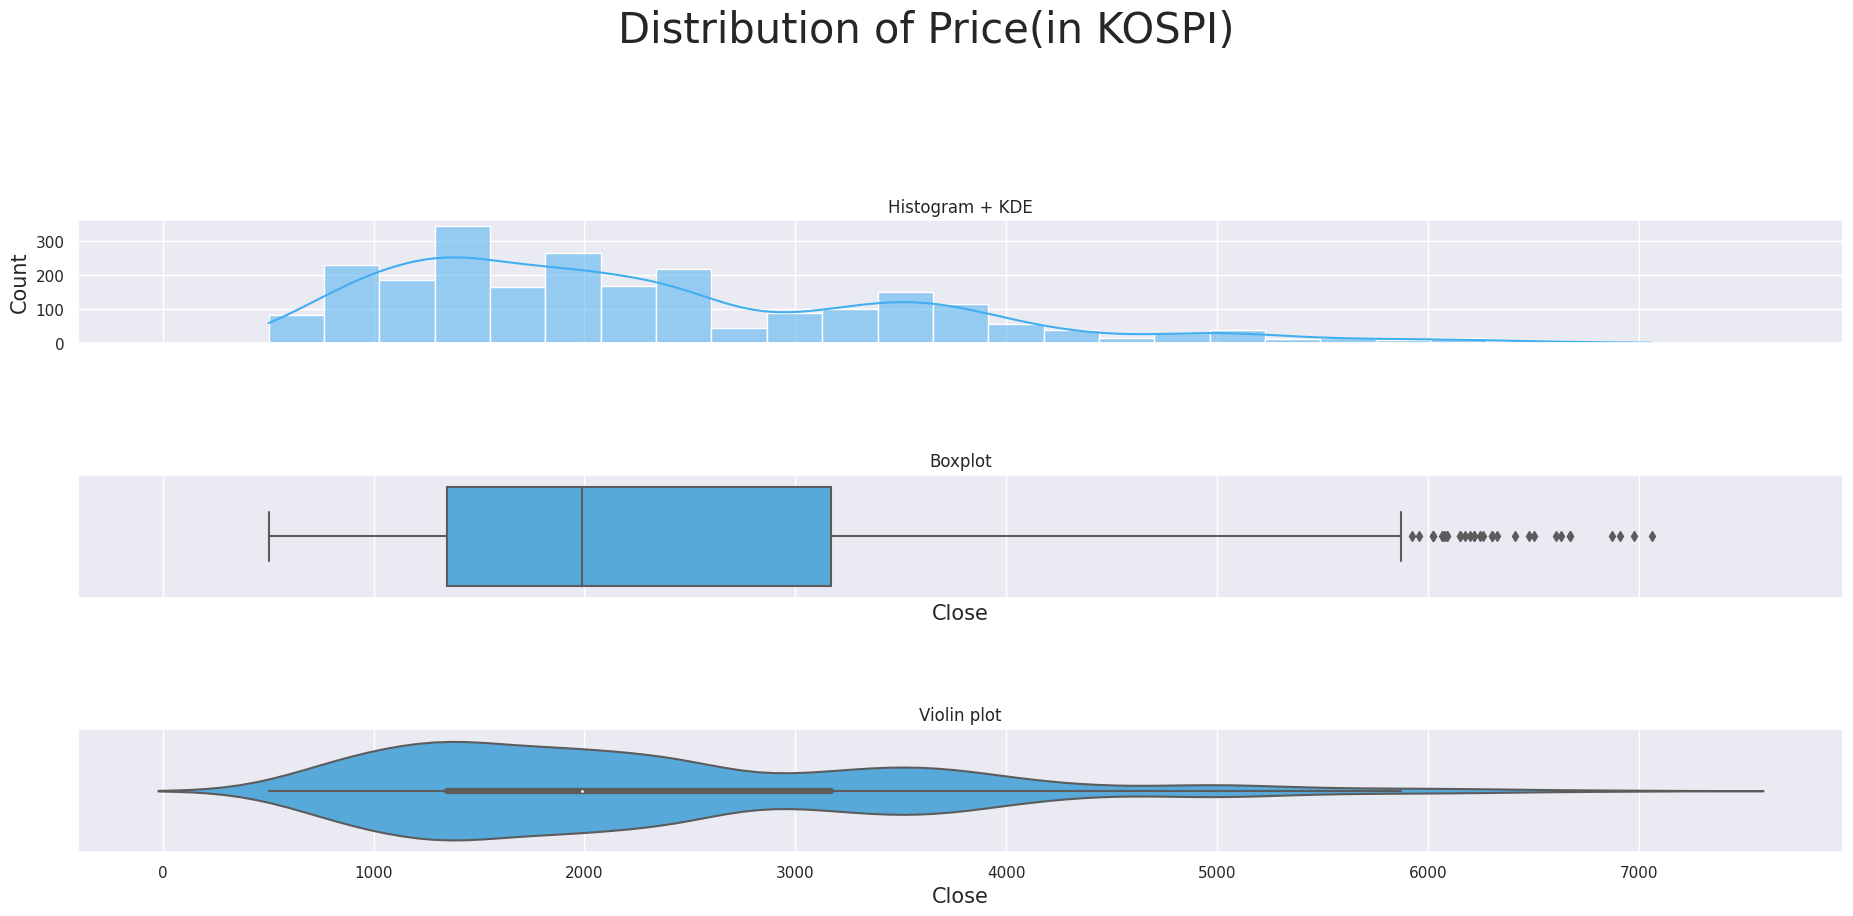

In [ ]:
three_plots(df['Close'],'Distribution of Price(in KOSPI)',custom_colors[0])

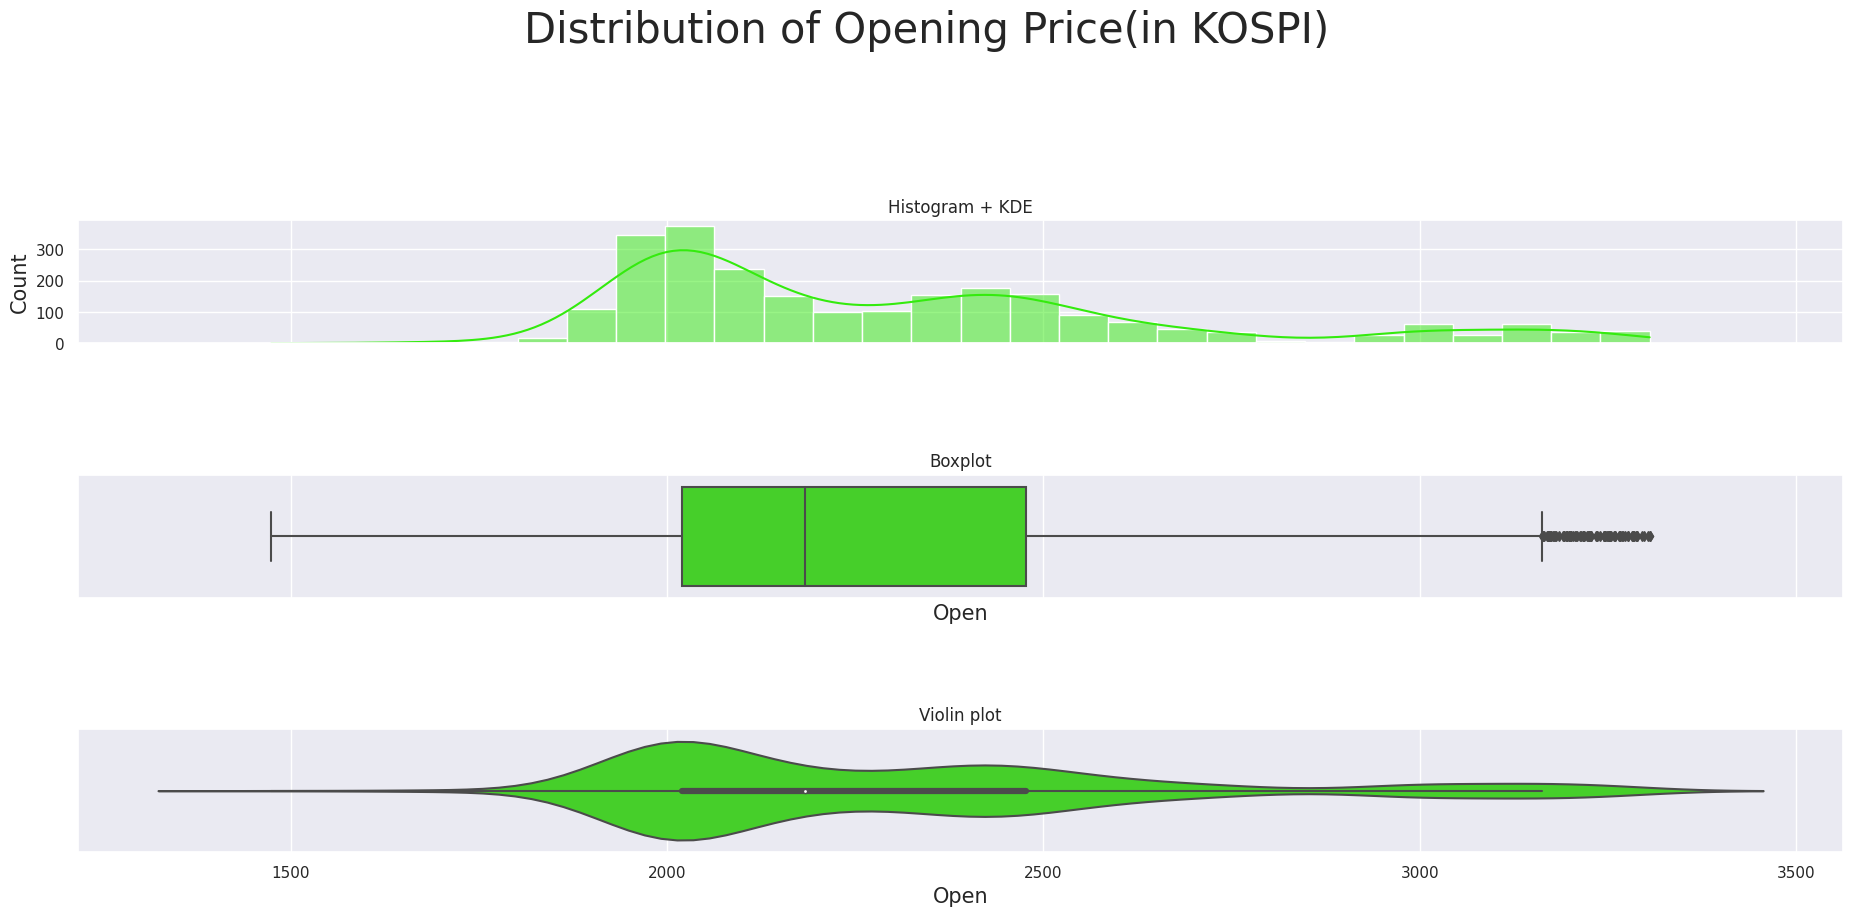

In [ ]:
three_plots(df['Open'],'Distribution of Opening Price(in KOSPI)',custom_colors[2])

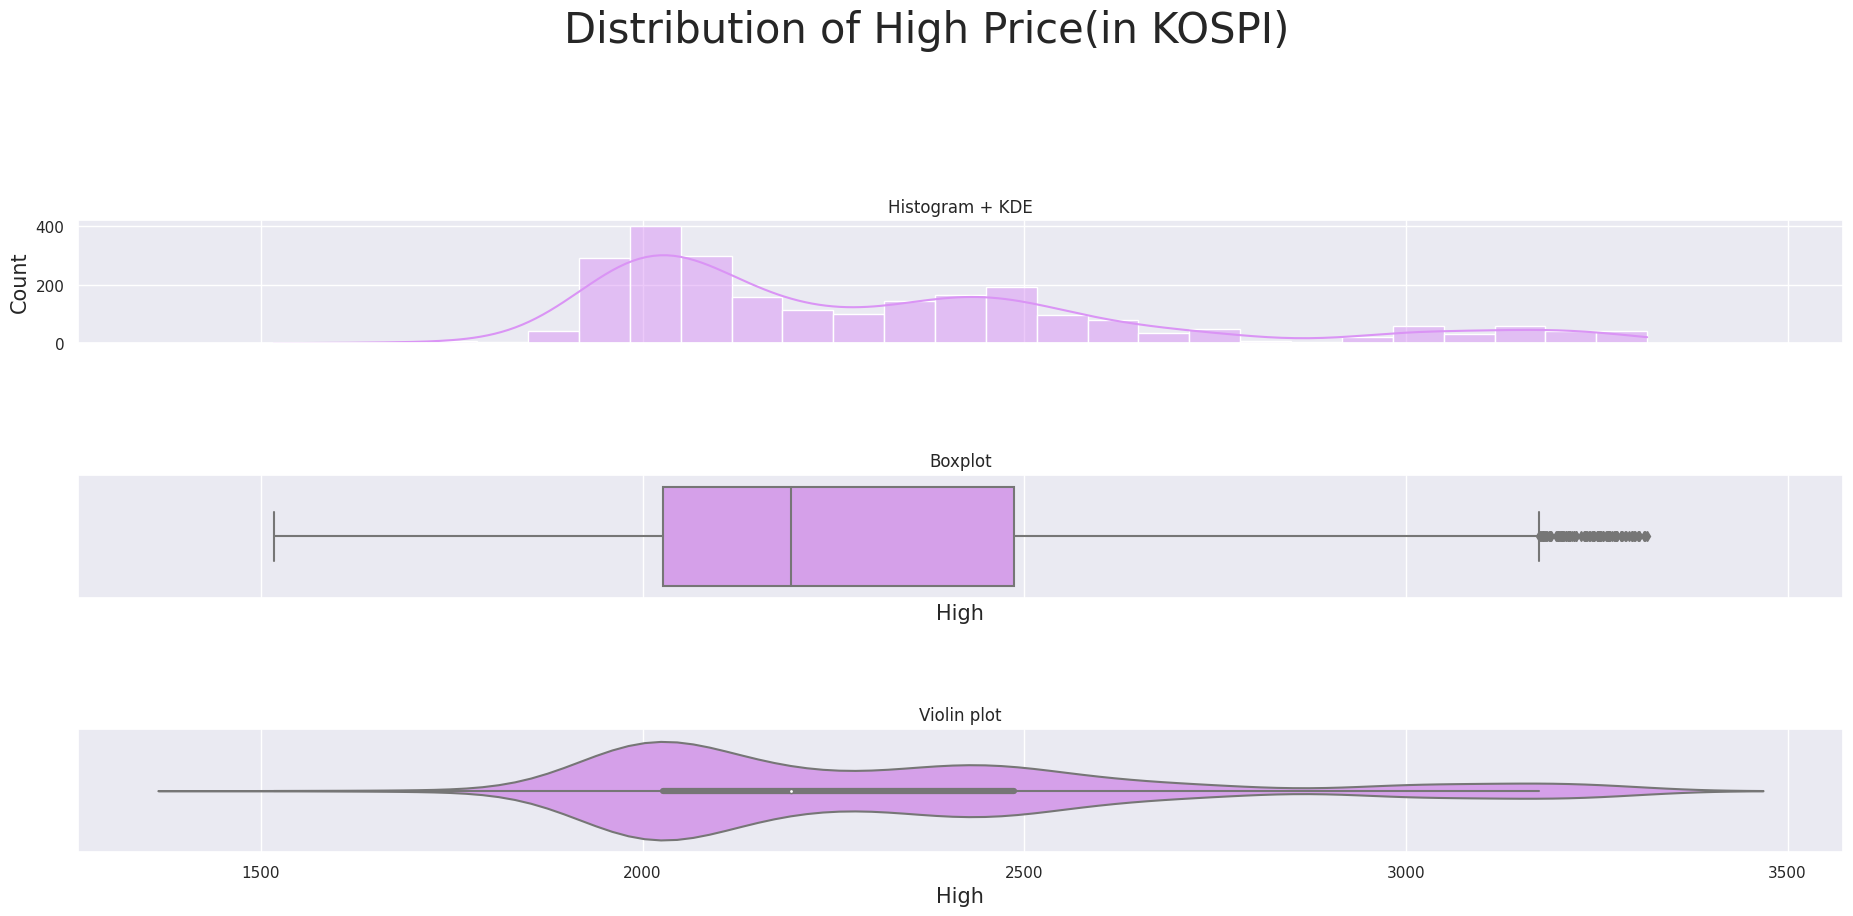

In [ ]:
three_plots(df['High'],'Distribution of High Price(in KOSPI)',custom_colors[3])

TypeError: ignored

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.


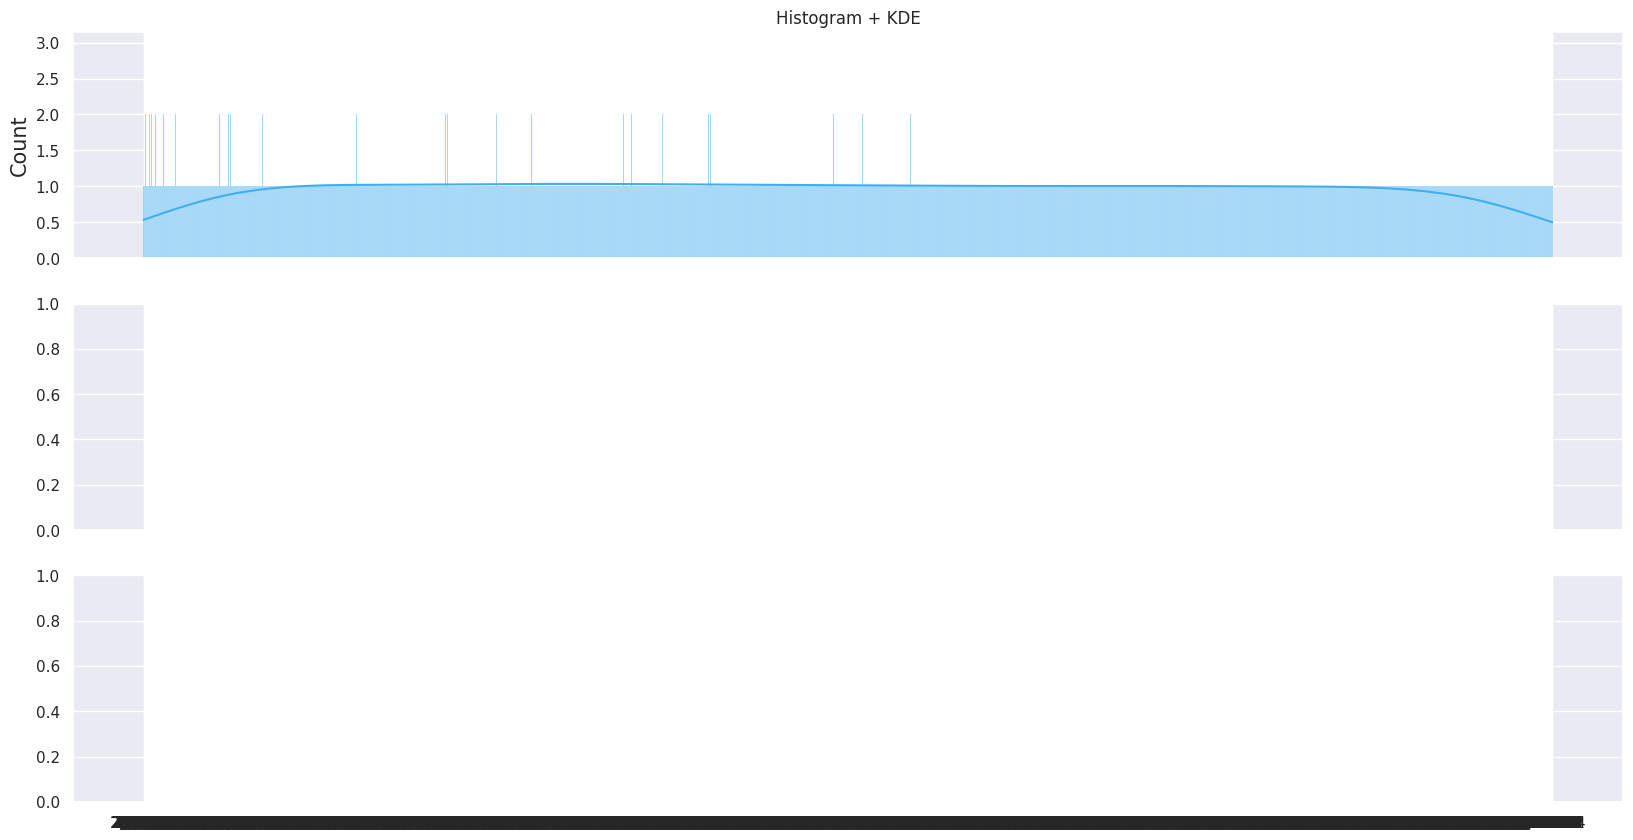

In [ ]:
three_plots(df['Low'],'Distribution of Low Price(in KOSPI)',custom_colors[0])

In [ ]:
three_plots(df['Volume'],'Distribution of Volume(in KOSPI)',custom_colors[2])

<ipython-input-17-7e00e2e9e1a5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df[df.columns[1:]].corr()
<ipython-input-17-7e00e2e9e1a5>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[df.columns[1:]].corr(), mask=mask, cmap='PiYG', vmax=.3, center=0,


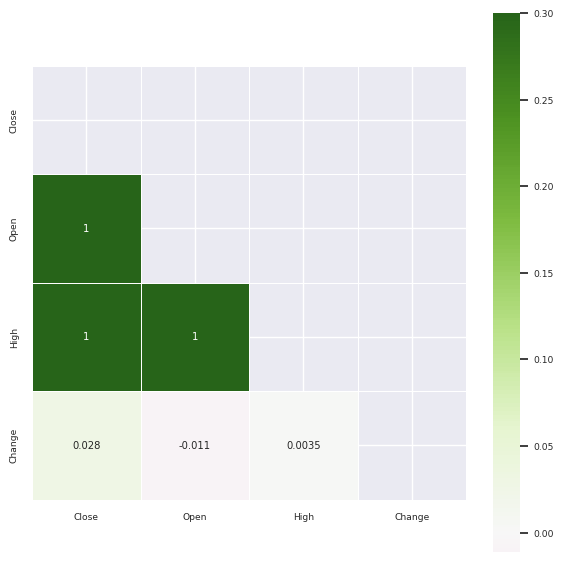

In [ ]:
# Kospi 상관분석
plt.figure(figsize=(7,7))
corr=df[df.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(font_scale = 0.6)
sns.heatmap(df[df.columns[1:]].corr(), mask=mask, cmap='PiYG', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [ ]:
#네트워크(networkx) 시각화 설정
indices = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_array(cor_matrix)
G = nx.relabel_nodes(G,lambda x: indices[x])

In [ ]:
# Networkx가 좋은점

# 데이터 간의 상관관계나 연결성 등 분석할 수 있는 카테고리가 상당히 많아짐

In [ ]:
#네트워크(networkx) 시각화
def corr_network(G, corr_direction, min_correlation):
    H = G.copy()

    for s1, s2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] < 0 or weight["weight"] < min_correlation:
                H.remove_edge(s1, s2)
        else:
            if weight["weight"] >= 0 or weight["weight"] > min_correlation:
                H.remove_edge(s1, s2)

    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])

    d = dict(nx.degree(H))
    nodelist=d.keys()
    node_sizes=d.values()

    positions=nx.circular_layout(H)

    plt.figure(figsize=(10,10))

    nx.draw_networkx_nodes(H,positions,node_color='#d100d1',nodelist=nodelist,
                       node_size=tuple([x**5 for x in node_sizes]),alpha=0.8)

    nx.draw_networkx_labels(H, positions, font_size=13)

    if corr_direction == "positive":
        edge_colour = plt.cm.summer
    else:
        edge_colour = plt.cm.autumn

    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show()

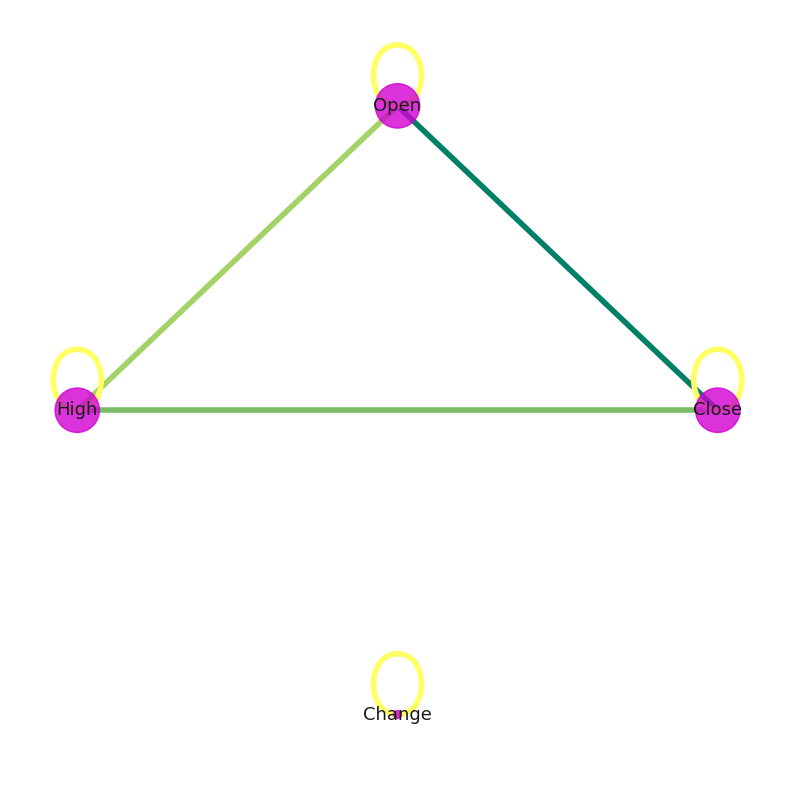

In [ ]:
corr_network(G, corr_direction="positive",min_correlation = 0.5)

In [ ]:
#Plotly (자동 캔들스틱 차트)

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])
                      ])

fig.update_layout(
    title='KOSPI STOCK Trading',
    yaxis_title='KOSPI Stock',
    shapes = [dict(
        x0='2020-05-30', x1='2020-05-30', y0=0, y1=1, xref='x', yref='paper',
        line_width=2, type ='line')],
    annotations=[dict(
        x='2020-05-30', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Increase Period Begins')]
)

fig.show()

In [ ]:
# #plotly picture
# from IPython.display import Image

# Image("plotly2.png")

In [ ]:
#Booktesting 사용하기
#Date을 index으로 변환
df2 = pd.read_csv("/content/drive/MyDrive/학교/cos.csv", index_col = 'Date', parse_dates=True)
df2.head(4)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2023-10-30,561,571,578,554,0.00K,-2.09%
2023-10-29,573,573,573,573,NaN,0.00%
2023-10-27,573,607,625,570,2.10M,-5.45%
2023-10-26,606,655,678,600,4.98M,-7.06%


In [ ]:
# Backtesting이 좋은점

# - 과거(History)데이터를 기반을 예측모델을 테스트하기 위해 모델링에 사용할 수 있음
# - 주식 및 금융 영역에서는 나의 전략이 과거에 어떻게 수행되었는지, 성과(performance)는 어땠는지 확인하여 좋은 결과 나올 경우 실제(미래)투자에 적용해 볼 수 있음
# - "Final"로 수익률를 볼 수 있음

In [ ]:
#Strategy를 상속한 class로 생성하기
import talib as talib
df2['Close'] = df2['Close'].str.replace(',', '').astype(float)
df2['Open'] = df2['Open'].str.replace(',', '').astype(float)
df2['High'] = df2['High'].str.replace(',', '').astype(float)
df2['Change'] = df2['Change'].str.replace('%', '').astype(float)
df2['Change'] = df2['Change'] / 100

class SmaCross(Strategy):

    n1 = 50
    n2 = 100

    def init(self):
        #price = self.data.Close
        price = df2['Close'].values
        self.ma1 = self.I(talib.SMA, price, self.n1)
        self.ma2 = self.I(talib.SMA, price, self.n2)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.position.close()
df2 = df2.sort_index()
df2

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2014-03-17,4100.0,4275.0,4275.0,"4,050",48.56K,-0.0238
2014-03-18,4145.0,4130.0,4205.0,"4,075",17.69K,0.0110
2014-03-19,4200.0,4195.0,4245.0,"4,100",36.76K,0.0133
2014-03-20,4220.0,4165.0,4230.0,"4,165",13.02K,0.0048
2014-03-21,4210.0,4255.0,4255.0,"4,175",14.79K,-0.0024
...,...,...,...,...,...,...
2023-10-25,652.0,586.0,718.0,572,13.94M,0.1032
2023-10-26,606.0,655.0,678.0,600,4.98M,-0.0706
2023-10-27,573.0,607.0,625.0,570,2.10M,-0.0545


In [ ]:
bt = Backtest(df2, SmaCross, commission=0.015, cash=100000000, exclusive_orders=True)

In [ ]:
outputs = bt.run()

In [ ]:
#Backtesting 상세정보
outputs

Start                     2014-03-17 00:00:00
End                       2023-10-30 00:00:00
Duration                   3514 days 00:00:00
Exposure Time [%]                   34.531185
Equity Final [$]                  5545754.245
Equity Peak [$]                   100000000.0
Return [%]                         -94.454246
Buy & Hold Return [%]              -86.317073
Return (Ann.) [%]                  -25.995208
Volatility (Ann.) [%]         70331950.567132
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -94.454246
Avg. Drawdown [%]                  -94.454246
Max. Drawdown Duration     3310 days 00:00:00
Avg. Drawdown Duration     3310 days 00:00:00
# Trades                                   18
Win Rate [%]                        16.666667
Best Trade [%]                      49.000767
Worst Trade [%]                    -65.599293
Avg. Trade [%]                    

In [ ]:
# from bokeh.models import Toolbar

# toolbar = Toolbar()

# bt.plot()

In [ ]:
# #booktesting picture
# from IPython.display import Image

# Image("backtesting2.png")

# # 수익률이 322% 나왔음

In [ ]:
df3 = df[["Date","Close"]]

<ipython-input-21-3eb5919a998c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



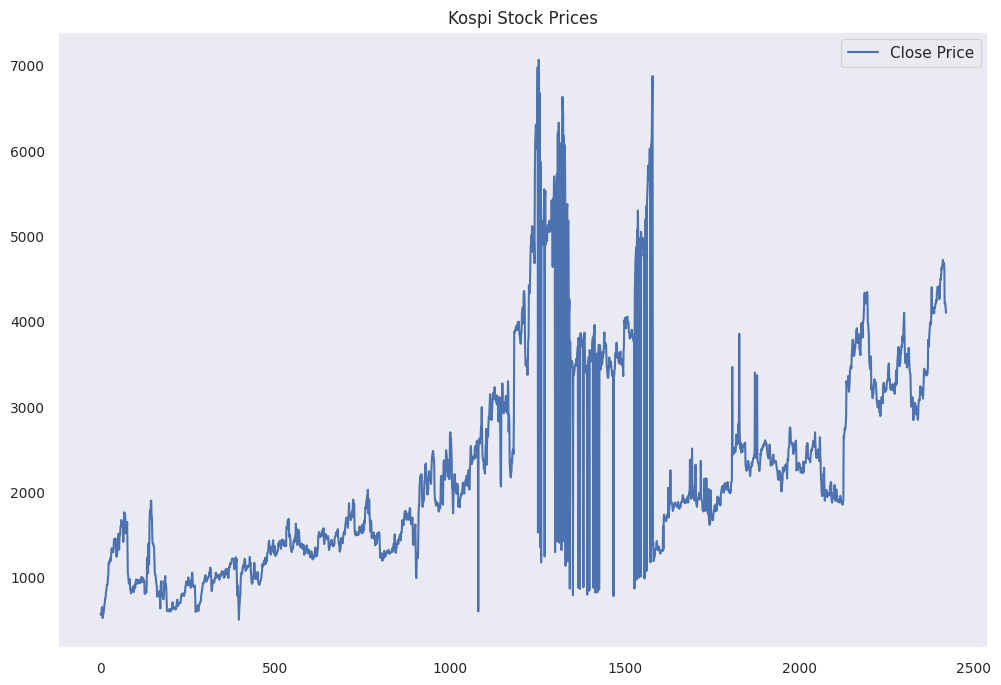

In [ ]:
#df의 "Date","Close"정보들을 가져와 시계열 차트 그리기
df3 = df[["Date","Close"]]
# df3['Close'] = df3['Close'].str.replace(',', '').astype(float)
df3['Date'] = pd.to_datetime(df.Date)
df3['Close'].plot(figsize=(12,8),title = "Kospi Stock Prices", fontsize=10, label = "Close Price")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# AutoTS 좋은점

# • 사용 중인 데이터 유형에 따라 달라지는 최적의 시계열 예측모형을 찾는 데 사용할 수 있음
# • 일변량 시계열과 다변량 시계열을 모두 처리할 수 있음
# • 또한 NaN값을 제거하고 채워 지저분한 데이터를 처리할 수 있으며 특이치도 처리할 수 있음
# • 이 파이썬 라이브러리에서 제공하는 모델을 배포에 사용할 수 있음

In [ ]:
  # AutoTS으로 Kospi 주식 훈련하기
model = AutoTS(forecast_length = 15, frequency = 'infer', ensemble = 'simple', drop_data_older_than_periods = 200)
model = model.fit(df3, date_col = "Date", value_col = "Close", id_col = None)

Data frequency is: B, used frequency is: B
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 8 with model DatepartRegression in generation 0 of 10
Epoch 1/50
6/6 [==============================] - 7s 6ms/step - loss: 0.3864
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3826
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3758
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3743
Epoch 5/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3705
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3670
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3630
Epoch 8/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3611
Epoch 9/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3532
Epoch 10/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3573
Epoch 11/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3472
Epoch 12/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3506
Epoch

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 36 with model FBProphet in generation 0 of 10
Model Number: 37 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 37 in generation 0: GluonTS
Model Number: 38 with model MultivariateRegression in generation 0 of 10
Model Number: 39 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 39 in generation 0: MultivariateRegression
Model Number: 40 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 40 in generation 0: DatepartRegression
Model Number: 41 with model SeasonalNaive in generation 0 of 10
Model Number: 42 with model DatepartRegression in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generati

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning:

invalid val

Model Number: 69 with model FBProphet in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 69 in generation 0: FBProphet
Model Number: 70 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 70 in generation 0: GluonTS
Model Number: 71 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 71 in generation 0: UnobservedComponents
Model Number: 72 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 72 in generation 0: VAR
Model Number: 73 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 73 in generation 0: VECM
Model Number: 74 with model ARIMA in genera

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=7.29958e-41): result may not be accurate.



Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 79 in generation 0: UnivariateMotif
Model Number: 80 with model MultivariateMotif in generation 0 of 10
Model Number: 81 with model SectionalMotif in generation 0 of 10
Model Number: 82 with model NVAR in generation 0 of 10
Model Number: 83 with model Theta in generation 0 of 10
Model Number: 84 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 84 in generation 0: ARDL
Model Number: 85 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 85 in generation 0: ARCH
Model Number: 86 with model MetricMotif in generation 0 of 10
Template Eval Error: IndexError('index 93 is out of bounds for axis 0 with size 37') in model 86 in generation 0: MetricMotif
Model Number: 87 with model NVAR in generation 0 of 10
Model Number: 88 with model ARDL in generation 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 114 with model GLS in generation 0 of 10
Model Number: 115 with model SeasonalNaive in generation 0 of 10
Model Number: 116 with model ARDL in generation 0 of 10
Model Number: 117 with model SeasonalNaive in generation 0 of 10
Model Number: 118 with model Theta in generation 0 of 10
Model Number: 119 with model NVAR in generation 0 of 10
Model Number: 120 with model UnobservedComponents in generation 0 of 10
Model Number: 121 with model UnobservedComponents in generation 0 of 10
Model Number: 122 with model ConstantNaive in generation 0 of 10
Model Number: 123 with model MetricMotif in generation 0 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 123 in generation 0: MetricMotif
Model Number: 124 with model ConstantNaive in generation 0 of 10
Model Number: 125 with model Theta in generation 0 of 10
Model Number: 126 with model MultivariateMotif in generation 0 of 10
Model Number: 127 with model AverageValueNaive in generation 0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=5.17996e-25): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=5.17996e-25): result may not be accurate.



Model Number: 144 with model UnobservedComponents in generation 0 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 144 in generation 0: UnobservedComponents
Model Number: 145 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 145 in generation 0: ARCH
Model Number: 146 with model ARDL in generation 0 of 10
Model Number: 147 with model UnobservedComponents in generation 0 of 10
Model Number: 148 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 148 in generation 0: ARIMA
Model Number: 149 with model SectionalMotif in generation 0 of 10
Model Number: 150 with model MultivariateMotif in generation 0 of 10
Model Number: 151 with model ConstantNaive in generation 0 of 10
Model Number: 152 with model NVAR in generation 0 of 10
Model Number: 153 with model SectionalMotif in generation 0 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 208 with model DatepartRegression in generation 1 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 208 in generation 1: DatepartRegression
Model Number: 209 with model AverageValueNaive in generation 1 of 10
Model Number: 210 with model LastValueNaive in generation 1 of 10
Model Number: 211 with model SectionalMotif in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in divide



Model Number: 212 with model UnivariateMotif in generation 1 of 10
Model Number: 213 with model SeasonalNaive in generation 1 of 10
Model Number: 214 with model NVAR in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=5.17996e-25): result may not be accurate.



Model Number: 215 with model MetricMotif in generation 1 of 10
Model Number: 216 with model WindowRegression in generation 1 of 10
Model Number: 217 with model ConstantNaive in generation 1 of 10
Model Number: 218 with model UnobservedComponents in generation 1 of 10
Model Number: 219 with model GLS in generation 1 of 10
Model Number: 220 with model ConstantNaive in generation 1 of 10
Model Number: 221 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 221 in generation 1: UnobservedComponents
Model Number: 222 with model LastValueNaive in generation 1 of 10
Model Number: 223 with model ARIMA in generation 1 of 10
Model Number: 224 with model SeasonalNaive in generation 1 of 10
Model Number: 225 with model GLS in generation 1 of 10
Model Number: 226 with model SeasonalNaive in generation 1 of 10
Model Number: 227 with model WindowRegression in generation 1 of 10
Model Number: 228 with

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning:

invalid value encountered in log



Model Number: 289 with model GLM in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning:

invalid value encountered in log



Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 289 in generation 1: GLM
Model Number: 290 with model Theta in generation 1 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 290 in generation 1: Theta
Model Number: 291 with model GLM in generation 1 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 291 in generation 1: GLM
Model Number: 292 with model MultivariateRegression in generation 1 of 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 309 with model ConstantNaive in generation 1 of 10
Model Number: 310 with model MultivariateRegression in generation 1 of 10
Model Number: 311 with model LastValueNaive in generation 1 of 10
New Generation: 2 of 10
Model Number: 312 with model ARIMA in generation 2 of 10
Model Number: 313 with model GLM in generation 2 of 10
Model Number: 314 with model MetricMotif in generation 2 of 10
Model Number: 315 with model GLS in generation 2 of 10
Model Number: 316 with model ARIMA in generation 2 of 10
Model Number: 317 with model LastValueNaive in generation 2 of 10
Model Number: 318 with model AverageValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 318 in generation 2: AverageValueNaive
Model Number: 319 with model ETS in generation 2 of 10
Model Number: 320 with model ARIMA in generation 2 of 10
Model Number: 321 with model ARDL in generation 2 of 10
Model Number: 322 with model AverageValueNaive in generation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=5.17996e-25): result may not be accurate.



Model Number: 382 with model MultivariateRegression in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:06:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 383 with model DatepartRegression in generation 2 of 10
Model Number: 384 with model LastValueNaive in generation 2 of 10
Model Number: 385 with model WindowRegression in generation 2 of 10
Model Number: 386 with model NVAR in generation 2 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 386 in generation 2: NVAR
Model Number: 387 with model UnobservedComponents in generation 2 of 10
Model Number: 388 with model AverageValueNaive in generation 2 of 10
Model Number: 389 with model Theta in generation 2 of 10
Model Number: 390 with model MultivariateMotif in generation 2 of 10
Model Number: 391 with model WindowRegression in generation 2 of 10
Model Number: 392 with model DatepartRegression in generation 2 of 10
Model Number: 393 with model GLS in generation 2 of 10
Model Number: 394 with model SeasonalNaive in generation 2 of 10
Model Number: 395 with model WindowRegression in generation 2 of 10
Model Number: 396 with model ARIM

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 401 with model AverageValueNaive in generation 2 of 10
Model Number: 402 with model ARIMA in generation 2 of 10
Model Number: 403 with model UnivariateMotif in generation 2 of 10
Model Number: 404 with model UnivariateMotif in generation 2 of 10
Model Number: 405 with model DatepartRegression in generation 2 of 10
Model Number: 406 with model SectionalMotif in generation 2 of 10
Model Number: 407 with model SectionalMotif in generation 2 of 10
Model Number: 408 with model ARDL in generation 2 of 10
Model Number: 409 with model SectionalMotif in generation 2 of 10
Model Number: 410 with model GLM in generation 2 of 10
Model Number: 411 with model UnobservedComponents in generation 2 of 10
Model Number: 412 with model MultivariateRegression in generation 2 of 10
Model Number: 413 with model Theta in generation 2 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 413 in generation 2: Theta
Model Number: 414 with model ETS in generat

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 418 with model Theta in generation 2 of 10
Model Number: 419 with model GLS in generation 2 of 10
Model Number: 420 with model SectionalMotif in generation 2 of 10
Model Number: 421 with model FBProphet in generation 2 of 10
Model Number: 422 with model UnivariateMotif in generation 2 of 10
Model Number: 423 with model Theta in generation 2 of 10
Model Number: 424 with model Theta in generation 2 of 10
Model Number: 425 with model UnivariateMotif in generation 2 of 10
Model Number: 426 with model ConstantNaive in generation 2 of 10
Model Number: 427 with model NVAR in generation 2 of 10
Model Number: 428 with model ConstantNaive in generation 2 of 10
Model Number: 429 with model SeasonalNaive in generation 2 of 10
Model Number: 430 with model ConstantNaive in generation 2 of 10
Model Number: 431 with model ARIMA in generation 2 of 10
Model Number: 432 with model GLM in generation 2 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed'

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 436 with model ETS in generation 2 of 10
New Generation: 3 of 10
Model Number: 437 with model Theta in generation 3 of 10
Model Number: 438 with model WindowRegression in generation 3 of 10
Model Number: 439 with model LastValueNaive in generation 3 of 10
Model Number: 440 with model Theta in generation 3 of 10
Model Number: 441 with model UnivariateMotif in generation 3 of 10
Model Number: 442 with model DatepartRegression in generation 3 of 10
Template Eval Error: InvalidParameterError("The 'min_samples_split' parameter of ExtraTreesRegressor must be an int in the range [2, inf) or a float in the range (0.0, 1.0]. Got 1 instead.") in model 442 in generation 3: DatepartRegression
Model Number: 443 with model ARIMA in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 443 in generation 3: ARIMA
Model Number: 444 with model UnobservedComponents in generation 3 of 10
Model Number: 445 with model Theta in g

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 455 with model SeasonalNaive in generation 3 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 455 in generation 3: SeasonalNaive
Model Number: 456 with model MetricMotif in generation 3 of 10
Model Number: 457 with model GLS in generation 3 of 10
Model Number: 458 with model MetricMotif in generation 3 of 10
Model Number: 459 with model GLM in generation 3 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 459 in generation 3: GLM
Model Number: 460 with model GLM in generation 3 of 10
Model Number: 461 with model ConstantNaive in generation 3 of 10
Model Number: 462 with model AverageValueNaive in generation 3 of 10
Model Number: 463 with model DatepartRegression in generation 3 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 463 in generation 3: DatepartRegression
Model Number: 464 with model GLS in generation 3 of 10
Model Number:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=5.17996e-25): result may not be accurate.



Model Number: 478 with model ARIMA in generation 3 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 478 in generation 3: ARIMA
Model Number: 479 with model ARIMA in generation 3 of 10
Model Number: 480 with model GLM in generation 3 of 10
Model Number: 481 with model UnobservedComponents in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 481 in generation 3: UnobservedComponents
Model Number: 482 with model SectionalMotif in generation 3 of 10
Model Number: 483 with model DatepartRegression in generation 3 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.560e+00, tolerance: 1.257e-03



Model Number: 484 with model UnobservedComponents in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 484 in generation 3: UnobservedComponents
Model Number: 485 with model GLS in generation 3 of 10
Model Number: 486 with model Theta in generation 3 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning:

Ignoring n_components with whiten=False.



Model Number: 487 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 487 in generation 3: DatepartRegression
Model Number: 488 with model ARIMA in generation 3 of 10
Model Number: 489 with model SectionalMotif in generation 3 of 10
Model Number: 490 with model UnivariateRegression in generation 3 of 10
Model Number: 491 with model Theta in generation 3 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.6976e-25): result may not be accurate.



Model Number: 492 with model SectionalMotif in generation 3 of 10
Model Number: 493 with model SeasonalNaive in generation 3 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 493 in generation 3: SeasonalNaive
Model Number: 494 with model LastValueNaive in generation 3 of 10
Model Number: 495 with model GLS in generation 3 of 10
Model Number: 496 with model MultivariateMotif in generation 3 of 10
Model Number: 497 with model ARDL in generation 3 of 10
Model Number: 498 with model ARDL in generation 3 of 10
Model Number: 499 with model AverageValueNaive in generation 3 of 10
Model Number: 500 with model DatepartRegression in generation 3 of 10
Model Number: 501 with model LastValueNaive in generation 3 of 10
Model Number: 502 with model UnobservedComponents in generation 3 of 10
Model Number: 503 with model MetricMotif in generation 3 of 10
Model Number: 504 with model WindowRegression in generation 3 of 10
Template Eval Error: Exception('Tran

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in divide



Model Number: 508 with model DatepartRegression in generation 3 of 10
Model Number: 509 with model GLS in generation 3 of 10
Model Number: 510 with model SeasonalNaive in generation 3 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 511 with model DatepartRegression in generation 3 of 10
Model Number: 512 with model WindowRegression in generation 3 of 10
Model Number: 513 with model SeasonalNaive in generation 3 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 514 with model ConstantNaive in generation 3 of 10
Model Number: 515 with model Theta in generation 3 of 10
Model Number: 516 with model UnobservedComponents in generation 3 of 10
Model Number: 517 with model ARIMA in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 517 in generation 3: ARIMA
Model Number: 518 with model SectionalMotif in generation 3 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (34)') in model 518 in generation 3: SectionalMotif
Model Number: 519 with model ARIMA in generation 3 of 10
Model Number: 520 with model WindowRegression in generation 3 of 10
Model Number: 521 with model ARIMA in generation 3 of 10
Model Number: 522 with model GLS in generation 3 of 10
Model Number: 523 with model MultivariateRegression in generation 3 of 10
Model Number: 524 with model ETS in generation 3 of 10
Model Number: 525 with model NVAR in generation 3 of 10
Model Number: 526 with m

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 536 with model MultivariateRegression in generation 3 of 10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 540 with model AverageValueNaive in generation 3 of 10
Model Number: 541 with model ARIMA in generation 3 of 10
Model Number: 542 with model MetricMotif in generation 3 of 10
Model Number: 543 with model GLS in generation 3 of 10
Model Number: 544 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 544 in generation 3: DatepartRegression
Model Number: 545 with model NVAR in generation 3 of 10
Model Number: 546 with model ARDL in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 546 in generation 3: ARDL
Model Number: 547 with model SeasonalNaive in generation 3 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 547 in generation 3: SeasonalNaive
Model Number: 548 with model UnivariateMotif in generation 3 of 10
Model Number: 549 with model ConstantNaive in generation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=5.17996e-25): result may not be accurate.



New Generation: 4 of 10
Model Number: 562 with model WindowRegression in generation 4 of 10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Curren

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 571 with model ARIMA in generation 4 of 10
Model Number: 572 with model ARDL in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 572 in generation 4: ARDL
Model Number: 573 with model GLS in generation 4 of 10
Model Number: 574 with model UnobservedComponents in generation 4 of 10
Model Number: 575 with model NVAR in generation 4 of 10
Model Number: 576 with model ETS in generation 4 of 10
Model Number: 577 with model FBProphet in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 578 with model AverageValueNaive in generation 4 of 10
Model Number: 579 with model SeasonalNaive in generation 4 of 10
Model Number: 580 with model AverageValueNaive in generation 4 of 10
Model Number: 581 with model MultivariateMotif in generation 4 of 10
Model Number: 582 with model UnobservedComponents in generation 4 of 10
Model Number: 583 with model GLS in generation 4 of 10
Model Number: 584 with model UnivariateMotif in generation 4 of 10
Model Number: 585 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 585 in generation 4: UnobservedComponents
Model Number: 586 with model AverageValueNaive in generation 4 of 10
Model Number: 587 with model MetricMotif in generation 4 of 10
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 587 in generation 4: MetricMotif
Model Number: 588 with model ARDL in generation 4 of 10
Model Number: 589

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 594 with model ARDL in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 594 in generation 4: ARDL
Model Number: 595 with model GLM in generation 4 of 10
Model Number: 596 with model MultivariateRegression in generation 4 of 10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:08:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 604 with model LastValueNaive in generation 4 of 10
Model Number: 605 with model NVAR in generation 4 of 10
Model Number: 606 with model Theta in generation 4 of 10
Model Number: 607 with model DatepartRegression in generation 4 of 10
Model Number: 608 with model GLS in generation 4 of 10
Model Number: 609 with model MultivariateMotif in generation 4 of 10
Model Number: 610 with model WindowRegression in generation 4 of 10
Model Number: 611 with model GLM in generation 4 of 10
Model Number: 612 with model UnobservedComponents in generation 4 of 10
Model Number: 613 with model GLM in generation 4 of 10
Model Number: 614 with model LastValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 614 in generation 4: LastValueNaive
Model Number: 615 with model Theta in generation 4 of 10
Model Number: 616 with model FBProphet in generation 4 of 10
Model Number: 617 with model Theta in generation 4 of 10
Model Number: 618 with mod

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=5.17996e-25): result may not be accurate.



Model Number: 625 with model UnobservedComponents in generation 4 of 10
Model Number: 626 with model GLM in generation 4 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 626 in generation 4: GLM
Model Number: 627 with model LastValueNaive in generation 4 of 10
Model Number: 628 with model MultivariateRegression in generation 4 of 10
Model Number: 629 with model ConstantNaive in generation 4 of 10
Model Number: 630 with model DatepartRegression in generation 4 of 10
Model Number: 631 with model AverageValueNaive in generation 4 of 10
Model Number: 632 with model NVAR in generation 4 of 10
Model Number: 633 with model ConstantNaive in generation 4 of 10
Model Number: 634 with model LastValueNaive in generation 4 of 10
Model Number: 635 with model LastValueNaive in generation 4 of 10
Model Number: 636 with model ARDL in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 636 in generation 4: ARDL

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 638 with model GLM in generation 4 of 10
Model Number: 639 with model ARDL in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in divide



Model Number: 640 with model ARIMA in generation 4 of 10
Model Number: 641 with model ConstantNaive in generation 4 of 10
Model Number: 642 with model ARIMA in generation 4 of 10
Model Number: 643 with model UnivariateMotif in generation 4 of 10
Model Number: 644 with model GLS in generation 4 of 10
Model Number: 645 with model SectionalMotif in generation 4 of 10
Model Number: 646 with model AverageValueNaive in generation 4 of 10
Model Number: 647 with model ARDL in generation 4 of 10
Model Number: 648 with model ConstantNaive in generation 4 of 10
Model Number: 649 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 650 with model AverageValueNaive in generation 4 of 10
Model Number: 651 with model UnobservedComponents in generation 4 of 10
Model Numb

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 669 with model SeasonalNaive in generation 4 of 10
Model Number: 670 with model Theta in generation 4 of 10
Model Number: 671 with model DatepartRegression in generation 4 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 671 in generation 4: DatepartRegression
Model Number: 672 with model MetricMotif in generation 4 of 10
Model Number: 673 with model ARIMA in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3242: RuntimeWarning:

overflow encountered in exp



Model Number: 674 with model ARDL in generation 4 of 10
Model Number: 675 with model ETS in generation 4 of 10
Model Number: 676 with model ARIMA in generation 4 of 10
Model Number: 677 with model Theta in generation 4 of 10
Model Number: 678 with model MetricMotif in generation 4 of 10
Model Number: 679 with model WindowRegression in generation 4 of 10
Model Number: 680 with model Theta in generation 4 of 10
Model Number: 681 with model GLM in generation 4 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 681 in generation 4: GLM
Model Number: 682 with model MultivariateRegression in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning:

invalid val

Template Eval Error: Exception('Transformer RobustScaler failed on inverse') in model 682 in generation 4: MultivariateRegression
Model Number: 683 with model SeasonalNaive in generation 4 of 10
Model Number: 684 with model ETS in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 685 with model UnivariateMotif in generation 4 of 10
Model Number: 686 with model ARIMA in generation 4 of 10
New Generation: 5 of 10
Model Number: 687 with model SeasonalNaive in generation 5 of 10
Model Number: 688 with model UnobservedComponents in generation 5 of 10
Model Number: 689 with model LastValueNaive in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning:

overflow encountered in multiply

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.57995e-25): result may not be accurate.



Template Eval Error: ValueError('Model LastValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 689 in generation 5: LastValueNaive
Model Number: 690 with model UnivariateRegression in generation 5 of 10
Model Number: 691 with model SeasonalNaive in generation 5 of 10
Model Number: 692 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 692 in generation 5: WindowRegression
Model Number: 693 with model ARDL in generation 5 of 10
Model Number: 694 with model Theta in generation 5 of 10
Model Number: 695 with model ARIMA in generation 5 of 10
Model Number: 696 with model MetricMotif in generation 5 of 10
Model Number: 697 with model GLM in generation 5 of 10
Model Number: 698 with model ETS in generation 5 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endo

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 700 with model Theta in generation 5 of 10
Model Number: 701 with model Theta in generation 5 of 10
Model Number: 702 with model MetricMotif in generation 5 of 10
Model Number: 703 with model AverageValueNaive in generation 5 of 10
Model Number: 704 with model FBProphet in generation 5 of 10
Model Number: 705 with model UnobservedComponents in generation 5 of 10
Model Number: 706 with model UnobservedComponents in generation 5 of 10
Model Number: 707 with model UnobservedComponents in generation 5 of 10
Model Number: 708 with model SeasonalNaive in generation 5 of 10
Model Number: 709 with model AverageValueNaive in generation 5 of 10
Model Number: 710 with model SeasonalNaive in generation 5 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 710 in generation 5: SeasonalNaive
Model Number: 711 with model UnobservedComponents in generation 5 of 10
Model Number: 712 with model SeasonalNaive in generation 5 of 10
Model Number: 713 wi

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in divide



Model Number: 734 with model MultivariateMotif in generation 5 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 734 in generation 5: MultivariateMotif
Model Number: 735 with model FBProphet in generation 5 of 10
Model Number: 736 with model MultivariateRegression in generation 5 of 10
Model Number: 737 with model ConstantNaive in generation 5 of 10
Model Number: 738 with model SeasonalNaive in generation 5 of 10
Model Number: 739 with model LastValueNaive in generation 5 of 10
Model Number: 740 with model AverageValueNaive in generation 5 of 10
Model Number: 741 with model ConstantNaive in generation 5 of 10
Model Number: 742 with model ARDL in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in divide



Model Number: 743 with model ConstantNaive in generation 5 of 10
Model Number: 744 with model MultivariateMotif in generation 5 of 10
Model Number: 745 with model FBProphet in generation 5 of 10
Model Number: 746 with model MultivariateRegression in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:09:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 747 with model LastValueNaive in generation 5 of 10
Model Number: 748 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 748 in generation 5: DatepartRegression
Model Number: 749 with model AverageValueNaive in generation 5 of 10
Model Number: 750 with model UnivariateRegression in generation 5 of 10
Model Number: 751 with model ARIMA in generation 5 of 10
Model Number: 752 with model UnivariateMotif in generation 5 of 10
Model Number: 753 with model LastValueNaive in generation 5 of 10
Model Number: 754 with model ConstantNaive in generation 5 of 10
Model Number: 755 with model ARIMA in generation 5 of 10
Model Number: 756 with model ConstantNaive in generation 5 of 10
Model Number: 757 with model ARIMA in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 757 in generation 5: ARIMA
Model Number: 758 with 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 761 with model WindowRegression in generation 5 of 10
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lam

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 765 with model LastValueNaive in generation 5 of 10
Model Number: 766 with model Theta in generation 5 of 10
Model Number: 767 with model ETS in generation 5 of 10
Model Number: 768 with model GLS in generation 5 of 10
Model Number: 769 with model MultivariateMotif in generation 5 of 10
Model Number: 770 with model UnivariateRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 770 in generation 5: UnivariateRegression
Model Number: 771 with model MultivariateRegression in generation 5 of 10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 w

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 774 with model GLS in generation 5 of 10
Model Number: 775 with model SeasonalNaive in generation 5 of 10
Model Number: 776 with model GLS in generation 5 of 10
Model Number: 777 with model MetricMotif in generation 5 of 10
Model Number: 778 with model DatepartRegression in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 778 in generation 5: DatepartRegression
Model Number: 779 with model ARIMA in generation 5 of 10
Model Number: 780 with model ARDL in generation 5 of 10
Model Number: 781 with model ETS in generation 5 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 782 with model WindowRegression in generation 5 of 10
Model Number: 783 with model MultivariateRegression in generation 5 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 783 in generation 5: MultivariateReg

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 786 with model ARIMA in generation 5 of 10
New Generation: 6 of 10
Model Number: 787 with model ARDL in generation 6 of 10
Model Number: 788 with model ARDL in generation 6 of 10
Model Number: 789 with model GLS in generation 6 of 10
Model Number: 790 with model SeasonalNaive in generation 6 of 10
Model Number: 791 with model ARIMA in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 791 in generation 6: ARIMA
Model Number: 792 with model DatepartRegression in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 793 with model MetricMotif in generation 6 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 793 in generation 6: MetricMotif
Model Number: 794 with model GLS in generation 6 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 794 in generation 6: GLS
Model Number: 795 with model ARIMA in generation 6 of 10
Model Number: 796 with model GLS in generation 6 of 10
Model Number: 797 with model ARDL in generation 6 of 10
Model Number: 798 with model Theta in generation 6 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 798 in generation 6: Theta
Model Number: 799 with model ARDL in generation 6 of 10
Model Number: 800 with model ConstantNaive in generation 6 of 10
Model Number: 801 with model ARIMA in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 801 in generation 6: ARIMA
Model Nu

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 806 with model ARIMA in generation 6 of 10
Model Number: 807 with model ARDL in generation 6 of 10
Model Number: 808 with model ARDL in generation 6 of 10
Model Number: 809 with model Theta in generation 6 of 10
Model Number: 810 with model Theta in generation 6 of 10
Model Number: 811 with model ARIMA in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 811 in generation 6: ARIMA
Model Number: 812 with model Theta in generation 6 of 10
Model Number: 813 with model LastValueNaive in generation 6 of 10
Model Number: 814 with model WindowRegression in generation 6 of 10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda

/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3242: RuntimeWarning:

overflow encountered in exp



Model Number: 817 with model ARDL in generation 6 of 10
Model Number: 818 with model LastValueNaive in generation 6 of 10
Model Number: 819 with model UnobservedComponents in generation 6 of 10
Model Number: 820 with model ARIMA in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 820 in generation 6: ARIMA
Model Number: 821 with model UnivariateRegression in generation 6 of 10
Model Number: 822 with model GLM in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.65466e-25): result may not be accurate.



Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'PowerTransformer', '1': 'AlignLastValue', '2': 'AlignLastValue', '3': 'CumSumTransformer', '4': 'QuantileTransformer'}, 'transformation_params': {'0': {}, '1': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {}, '4': {'output_distribution': 'uniform', 'n_quantiles': 18}}}. fail_on_forecast_nan=True") in model 822 in generation 6: GLM
Model Number: 823 with model FBProphet in generation 6 of 10
Model Number: 824 with model GLM in generation 6 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 824 in generation 6: GLM
Model Number: 825 with model AverageValueNaive in generation 6 of 10
Model Number: 826 wit

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:188: RuntimeWarning:

invalid value encountered in divide



Model Number: 828 with model LastValueNaive in generation 6 of 10
Model Number: 829 with model MetricMotif in generation 6 of 10
Model Number: 830 with model MultivariateRegression in generation 6 of 10
Model Number: 831 with model ARIMA in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 831 in generation 6: ARIMA
Model Number: 832 with model ARIMA in generation 6 of 10
Model Number: 833 with model ARDL in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 833 in generation 6: ARDL
Model Number: 834 with model UnivariateRegression in generation 6 of 10
Model Number: 835 with model GLM in generation 6 of 10
Model Number: 836 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 836 in generation 6: UnobservedComponents
Model Number: 837 with model UnobservedComponents

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning:

overflow encountered in double_scalars



Model Number: 838 with model GLM in generation 6 of 10
Model Number: 839 with model MultivariateRegression in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:09:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 840 with model ConstantNaive in generation 6 of 10
Model Number: 841 with model DatepartRegression in generation 6 of 10
Model Number: 842 with model GLS in generation 6 of 10
Model Number: 843 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 843 in generation 6: DatepartRegression
Model Number: 844 with model AverageValueNaive in generation 6 of 10
Model Number: 845 with model UnobservedComponents in generation 6 of 10
Model Number: 846 with model Theta in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 846 in generation 6: Theta
Model Number: 847 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'SeasonalDifference', '1': 'AnomalyRemoval', '2': 'AlignLastValue'}, 'transformation_params': {'0': {'lag_1': 86, 'method': 'LastValue'}, '1': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'linear', 'transform_dict': None}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 847 in generation 6: MultivariateRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=5.17996e-25): result may not be accurate.



Model Number: 848 with model GLM in generation 6 of 10
Model Number: 849 with model MultivariateMotif in generation 6 of 10
Model Number: 850 with model DatepartRegression in generation 6 of 10
Model Number: 851 with model ARIMA in generation 6 of 10
Model Number: 852 with model FBProphet in generation 6 of 10
Model Number: 853 with model SeasonalNaive in generation 6 of 10
Model Number: 854 with model WindowRegression in generation 6 of 10
Model Number: 855 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 855 in generation 6: DatepartRegression
Model Number: 856 with model LastValueNaive in generation 6 of 10
Model Number: 857 with model ConstantNaive in generation 6 of 10
Model Number: 858 with model UnivariateMotif in generation 6 of 10
Model Number: 859 with model UnobservedComponents in generation 6 of 10
Model Number: 860 with model DatepartRegression in generation 6 of 10
Model N

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in divide



[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:09:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 894 with model MetricMotif in generation 7 of 10
Model Number: 895 with model UnivariateRegression in generation 7 of 10
Model Number: 896 with model Theta in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.22379e-24): result may not be accurate.



Model Number: 897 with model DatepartRegression in generation 7 of 10
Model Number: 898 with model ARIMA in generation 7 of 10
Model Number: 899 with model AverageValueNaive in generation 7 of 10
Model Number: 900 with model ARIMA in generation 7 of 10
Model Number: 901 with model LastValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 901 in generation 7: LastValueNaive
Model Number: 902 with model GLS in generation 7 of 10
Model Number: 903 with model ARIMA in generation 7 of 10
Model Number: 904 with model WindowRegression in generation 7 of 10
Model Number: 905 with model UnobservedComponents in generation 7 of 10
Model Number: 906 with model ConstantNaive in generation 7 of 10
Model Number: 907 with model GLM in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 908 with model DatepartRegression in generation 7 of 10
Model Number: 909 with model UnivariateMotif in generation 7 of 10
Model Number: 910 with model ETS in generation 7 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 910 in generation 7: ETS
Model Number: 911 with model LastValueNaive in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 912 with model MultivariateRegression in generation 7 of 10
Model Number: 913 with model WindowRegression in generation 7 of 10
Model Number: 914 with model ARDL in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 915 with model GLS in generation 7 of 10
Model Number: 916 with model ARDL in generation 7 of 10
Model Number: 917 with model ARIMA in generation 7 of 10
Model Number: 918 with model ARDL in generation 7 of 10
Model Number: 919 with model ARIMA in generation 7 of 10
Model Number: 920 with model Theta in generation 7 of 10
Model Number: 921 with model UnivariateMotif in generation 7 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 921 in generation 7: UnivariateMotif
Model Number: 922 with model UnivariateRegression in generation 7 of 10
Model Number: 923 with model GLS in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.71865e-25): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in divide



Model Number: 924 with model GLM in generation 7 of 10
Model Number: 925 with model WindowRegression in generation 7 of 10
Model Number: 926 with model FBProphet in generation 7 of 10
Model Number: 927 with model GLM in generation 7 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 927 in generation 7: GLM
Model Number: 928 with model ETS in generation 7 of 10
Model Number: 929 with model MultivariateMotif in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning:

invalid val

Model Number: 930 with model ARDL in generation 7 of 10
Model Number: 931 with model ARIMA in generation 7 of 10
Model Number: 932 with model ConstantNaive in generation 7 of 10
Model Number: 933 with model ConstantNaive in generation 7 of 10
Model Number: 934 with model UnobservedComponents in generation 7 of 10
Model Number: 935 with model LastValueNaive in generation 7 of 10
Model Number: 936 with model ARIMA in generation 7 of 10
Model Number: 937 with model AverageValueNaive in generation 7 of 10
Model Number: 938 with model LastValueNaive in generation 7 of 10
Model Number: 939 with model UnivariateRegression in generation 7 of 10
Model Number: 940 with model FBProphet in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 940 in generation 7: FBProphet
Model Number: 941 with model MultivariateRegression in generation 7 of 10
Model Number: 942 with model ARIMA in generation 7 of 10
Model Number: 943 with model UnobservedComponents in gener

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:10:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 948 with model SeasonalNaive in generation 7 of 10
Model Number: 949 with model WindowRegression in generation 7 of 10
Model Number: 950 with model LastValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 950 in generation 7: LastValueNaive
Model Number: 951 with model ARIMA in generation 7 of 10
Model Number: 952 with model SectionalMotif in generation 7 of 10
Model Number: 953 with model DatepartRegression in generation 7 of 10
Model Number: 954 with model GLS in generation 7 of 10
Model Number: 955 with model MetricMotif in generation 7 of 10
Model Number: 956 with model UnobservedComponents in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 957 with model UnobservedComponents in generation 7 of 10
Model Number: 958 with model DatepartRegression in generation 7 of 10
Model Number: 959 with model GLM in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



Model Number: 960 with model SeasonalNaive in generation 7 of 10
Model Number: 961 with model MultivariateMotif in generation 7 of 10
Model Number: 962 with model SeasonalNaive in generation 7 of 10
Model Number: 963 with model SeasonalNaive in generation 7 of 10
Model Number: 964 with model MultivariateMotif in generation 7 of 10
Model Number: 965 with model UnobservedComponents in generation 7 of 10
Model Number: 966 with model Theta in generation 7 of 10
Model Number: 967 with model LastValueNaive in generation 7 of 10
Model Number: 968 with model WindowRegression in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 968 in generation 7: WindowRegression
Model Number: 969 with model UnobservedComponents in generation 7 of 10
Model Number: 970 with model SeasonalNaive in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 970 in generation 7: SeasonalNaive
Model Number: 971 with model

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 982 with model ARDL in generation 7 of 10
Model Number: 983 with model UnobservedComponents in generation 7 of 10
Model Number: 984 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 984 in generation 7: UnobservedComponents
Model Number: 985 with model SeasonalNaive in generation 7 of 10
Model Number: 986 with model SectionalMotif in generation 7 of 10
New Generation: 8 of 10
Model Number: 987 with model AverageValueNaive in generation 8 of 10
Model Number: 988 with model NVAR in generation 8 of 10
Model Number: 989 with model UnivariateRegression in generation 8 of 10
Model Number: 990 with model SectionalMotif in generation 8 of 10
Model Number: 991 with model SeasonalNaive in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.22382e-24): result may not be accurate.



Model Number: 992 with model UnobservedComponents in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 992 in generation 8: UnobservedComponents
Model Number: 993 with model FBProphet in generation 8 of 10
Model Number: 994 with model SeasonalNaive in generation 8 of 10
Model Number: 995 with model FBProphet in generation 8 of 10
Model Number: 996 with model ARDL in generation 8 of 10
Model Number: 997 with model FBProphet in generation 8 of 10
Model Number: 998 with model AverageValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 998 in generation 8: AverageValueNaive
Model Number: 999 with model ARIMA in generation 8 of 10
Model Number: 1000 with model FBProphet in generation 8 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1000 in generation 8: FBProphet
Model Number: 1001 with model WindowRegression in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:10:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 1002 with model MultivariateRegression in generation 8 of 10
Model Number: 1003 with model ARDL in generation 8 of 10
Model Number: 1004 with model DatepartRegression in generation 8 of 10
Model Number: 1005 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1005 in generation 8: DatepartRegression
Model Number: 1006 with model MultivariateRegression in generation 8 of 10
Epoch 1/50
6/6 [==============================] - 6s 72ms/step - loss: 0.0441
Epoch 2/50
6/6 [==============================] - 0s 71ms/step - loss: 0.0179
Epoch 3/50
6/6 [==============================] - 0s 70ms/step - loss: 0.0150
Epoch 4/50
6/6 [==============================] - 0s 70ms/step - loss: 0.0162
Epoch 5/50
6/6 [==============================] - 0s 68ms/step - loss: 0.0166
Epoch 6/50
6/6 [==============================] - 0s 72ms/step - loss: 0.0155
Epoch 7/50
6/6 [============================

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1010 with model MultivariateRegression in generation 8 of 10
Model Number: 1011 with model UnobservedComponents in generation 8 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1011 in generation 8: UnobservedComponents
Model Number: 1012 with model ARIMA in generation 8 of 10
Model Number: 1013 with model GLM in generation 8 of 10
Model Number: 1014 with model ARDL in generation 8 of 10
Model Number: 1015 with model FBProphet in generation 8 of 10
Model Number: 1016 with model ConstantNaive in generation 8 of 10
Model Number: 1017 with model ConstantNaive in generation 8 of 10
Model Number: 1018 with model GLM in generation 8 of 10
Model Number: 1019 with model DatepartRegression in generation 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1034 in generation 8: AverageValueNaive
Model Number: 1035 with model ARIMA in generation 8 of 10
Model Number: 1036 with model GLM in generation 8 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1036 in generation 8: GLM
Model Number: 1037 with model UnobservedComponents in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning:

invalid val

Model Number: 1038 with model LastValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1038 in generation 8: LastValueNaive
Model Number: 1039 with model LastValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 1039 in generation 8: LastValueNaive
Model Number: 1040 with model UnivariateMotif in generation 8 of 10
Model Number: 1041 with model ARIMA in generation 8 of 10
Model Number: 1042 with model LastValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1042 in generation 8: LastValueNaive
Model Number: 1043 with model UnivariateRegression in generation 8 of 10
Model Number: 1044 with model LastValueNaive in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.71856e-25): result may not be accurate.



Model Number: 1045 with model Theta in generation 8 of 10
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 1045 in generation 8: Theta
Model Number: 1046 with model UnobservedComponents in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1047 with model UnivariateRegression in generation 8 of 10
Model Number: 1048 with model UnivariateMotif in generation 8 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 1048 in generation 8: UnivariateMotif
Model Number: 1049 with model AverageValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1049 in generation 8: AverageValueNaive
Model Number: 1050 with model ConstantNaive in generation 8 of 10
Model Number: 1051 with model UnivariateRegression in generation 8 of 10
Model Number: 1052 with model Theta in generation 8 of 10
Model Number: 1053 with model ARIMA in generation 8 of 10
Model Number: 1054 with model GLS in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3242: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3242: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3305: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3242: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3305: RuntimeWarning:

invalid value encountered in matmul



Model Number: 1055 with model SectionalMotif in generation 8 of 10
Model Number: 1056 with model Theta in generation 8 of 10
Model Number: 1057 with model MultivariateRegression in generation 8 of 10
Model Number: 1058 with model LastValueNaive in generation 8 of 10
Model Number: 1059 with model MultivariateRegression in generation 8 of 10
Model Number: 1060 with model UnobservedComponents in generation 8 of 10
Model Number: 1061 with model MetricMotif in generation 8 of 10
Model Number: 1062 with model MetricMotif in generation 8 of 10
Model Number: 1063 with model ETS in generation 8 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1064 with model ARIMA in generation 8 of 10
Model Number: 1065 with model UnivariateRegression in generation 8 of 10
Model Number: 1066 with model Las

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=5.17996e-25): result may not be accurate.



Model Number: 1071 with model UnobservedComponents in generation 8 of 10
Model Number: 1072 with model GLM in generation 8 of 10
Model Number: 1073 with model DatepartRegression in generation 8 of 10
Model Number: 1074 with model ARDL in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1075 with model MetricMotif in generation 8 of 10
Model Number: 1076 with model ARIMA in generation 8 of 10
Model Number: 1077 with model GLM in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



Model Number: 1078 with model ConstantNaive in generation 8 of 10
Model Number: 1079 with model GLM in generation 8 of 10
Template Eval Error: ValueError('Model GLM returned NaN for one or more series. fail_on_forecast_nan=True') in model 1079 in generation 8: GLM
Model Number: 1080 with model WindowRegression in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

divide by zero encountered in log



Model Number: 1081 with model Theta in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1082 with model ETS in generation 8 of 10
Model Number: 1083 with model ETS in generation 8 of 10
Model Number: 1084 with model MultivariateRegression in generation 8 of 10
Epoch 1/100
12/12 [==============================] - 5s 7ms/step - loss: 19.5325
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 19.5316
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 19.5297
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 19.5324
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 19.5320
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 19.5311
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 19.5314
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 19.5315
Epoch 9/100
12/12 [==============================] - 0s 6ms/step - loss: 19.5311
Epoch 10/100
12/12 [==============================] - 0s 6ms/step - loss: 19.5314
Ep

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



New Generation: 9 of 10
Model Number: 1087 with model ARDL in generation 9 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1087 in generation 9: ARDL
Model Number: 1088 with model UnivariateMotif in generation 9 of 10
Model Number: 1089 with model LastValueNaive in generation 9 of 10
Model Number: 1090 with model MultivariateRegression in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:12:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 1091 with model MetricMotif in generation 9 of 10
Model Number: 1092 with model LastValueNaive in generation 9 of 10
Model Number: 1093 with model WindowRegression in generation 9 of 10
Model Number: 1094 with model UnivariateRegression in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1095 with model UnivariateRegression in generation 9 of 10
Model Number: 1096 with model DatepartRegression in generation 9 of 10
Model Number: 1097 with model LastValueNaive in generation 9 of 10
Model Number: 1098 with model MultivariateRegression in generation 9 of 10
Model Number: 1099 with model Theta in generation 9 of 10
Model Number: 1100 with model GLS in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1100 in generation 9: GLS
Model Number: 1101 with model NVAR in generation 9 of 10
Model Number: 1102 with model UnivariateRegression in generation 9 of 10
Model Number: 1103 with model DatepartRegression in generation 9 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 1103 in generation 9: DatepartRegression
Model Number: 1104 with model Theta in generation 9 of 10
Model Number: 1105 with model GLM in generation 9 of 10
Template Eval Error: ValueError('NaN, inf or invalid value

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning:

invalid val

Model Number: 1107 with model Theta in generation 9 of 10
Model Number: 1108 with model GLM in generation 9 of 10
Model Number: 1109 with model AverageValueNaive in generation 9 of 10
Model Number: 1110 with model UnobservedComponents in generation 9 of 10
Model Number: 1111 with model GLM in generation 9 of 10
Model Number: 1112 with model UnobservedComponents in generation 9 of 10
Model Number: 1113 with model ARIMA in generation 9 of 10
Model Number: 1114 with model ARIMA in generation 9 of 10
Model Number: 1115 with model MetricMotif in generation 9 of 10
Model Number: 1116 with model AverageValueNaive in generation 9 of 10
Model Number: 1117 with model ARDL in generation 9 of 10
Model Number: 1118 with model AverageValueNaive in generation 9 of 10
Model Number: 1119 with model ARDL in generation 9 of 10
Model Number: 1120 with model AverageValueNaive in generation 9 of 10
Model Number: 1121 with model WindowRegression in generation 9 of 10
Model Number: 1122 with model DatepartReg

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:12:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 1134 with model SeasonalNaive in generation 9 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1134 in generation 9: SeasonalNaive
Model Number: 1135 with model FBProphet in generation 9 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1135 in generation 9: FBProphet
Model Number: 1136 with model ConstantNaive in generation 9 of 10
Model Number: 1137 with model Theta in generation 9 of 10
Model Number: 1138 with model ConstantNaive in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1139 with model LastValueNaive in generation 9 of 10
Model Number: 1140 with model UnivariateRegression in generation 9 of 10
Model Number: 1141 with model ARDL in generation 9 of 10
Model Number: 1142 with model LastValueNaive in generation 9 of 10
Model Number: 1143 with model AverageValueNaive in generation 9 of 10
Model Number: 1144 with model DatepartRegression in generation 9 of 10
Model Number: 1145 with model MetricMotif in generation 9 of 10
Model Number: 1146 with model ARDL in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1147 with model FBProphet in generation 9 of 10
Model Number: 1148 with model UnivariateRegression in generation 9 of 10
Model Number: 1149 with model ARDL in generation 9 of 10
Model Number: 1150 with model Theta in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.71766e-25): result may not be accurate.



Model Number: 1151 with model UnivariateRegression in generation 9 of 10
Model Number: 1152 with model ARIMA in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.65423e-25): result may not be accurate.



Model Number: 1153 with model GLS in generation 9 of 10
Model Number: 1154 with model MultivariateRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1154 in generation 9: MultivariateRegression
Model Number: 1155 with model MetricMotif in generation 9 of 10
Model Number: 1156 with model Theta in generation 9 of 10
Model Number: 1157 with model SectionalMotif in generation 9 of 10
Model Number: 1158 with model MetricMotif in generation 9 of 10
Model Number: 1159 with model GLM in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



Model Number: 1160 with model GLS in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in divide



Model Number: 1161 with model LastValueNaive in generation 9 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1161 in generation 9: LastValueNaive
Model Number: 1162 with model WindowRegression in generation 9 of 10
Model Number: 1163 with model GLS in generation 9 of 10
Model Number: 1164 with model ARDL in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning:

invalid value encountered in log



Model Number: 1165 with model GLM in generation 9 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1165 in generation 9: GLM
Model Number: 1166 with model SeasonalNaive in generation 9 of 10
Model Number: 1167 with model ETS in generation 9 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1168 with model WindowRegression in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1168 in generation 9: WindowRegression
Model Number: 1169 with model ETS in generation 9 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.42959e-25): result may not be accurate.



Model Number: 1183 with model AverageValueNaive in generation 9 of 10
Model Number: 1184 with model UnobservedComponents in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1184 in generation 9: UnobservedComponents
Model Number: 1185 with model UnivariateRegression in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.71862e-25): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:12:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 1186 with model MultivariateRegression in generation 9 of 10
New Generation: 10 of 10
Model Number: 1187 with model DatepartRegression in generation 10 of 10
Model Number: 1188 with model ARIMA in generation 10 of 10
Model Number: 1189 with model ETS in generation 10 of 10
Model Number: 1190 with model UnobservedComponents in generation 10 of 10
Model Number: 1191 with model LastValueNaive in generation 10 of 10
Model Number: 1192 with model ARIMA in generation 10 of 10
Model Number: 1193 with model GLS in generation 10 of 10
Model Number: 1194 with model ARIMA in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=5.17996e-25): result may not be accurate.



Model Number: 1195 with model AverageValueNaive in generation 10 of 10
Model Number: 1196 with model UnobservedComponents in generation 10 of 10
Model Number: 1197 with model ARDL in generation 10 of 10
Model Number: 1198 with model MultivariateRegression in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:12:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 1199 with model FBProphet in generation 10 of 10
Model Number: 1200 with model DatepartRegression in generation 10 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 1200 in generation 10: DatepartRegression
Model Number: 1201 with model UnobservedComponents in generation 10 of 10
Model Number: 1202 with model MetricMotif in generation 10 of 10
Model Number: 1203 with model ETS in generation 10 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1204 with model MetricMotif in generation 10 of 10
Model Number: 1205 with model ARIMA in generation 10 of 10
Model Number: 1206 with model ARIMA in generation 10 of 10
Model Number: 1207 with model MultivariateRegression in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:12:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 1208 with model MultivariateMotif in generation 10 of 10
Model Number: 1209 with model GLS in generation 10 of 10
Model Number: 1210 with model ARDL in generation 10 of 10
Model Number: 1211 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1211 in generation 10: WindowRegression
Model Number: 1212 with model ConstantNaive in generation 10 of 10
Model Number: 1213 with model Theta in generation 10 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1213 in generation 10: Theta
Model Number: 1214 with model SeasonalNaive in generation 10 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1214 in generation 10: SeasonalNaive
Model Number: 1215 with model Theta in generation 10 of 10
Model Number: 1216 with model MetricMotif in generation 10 of 10
Model Number: 1217 with model LastValueNaive in

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1222 with model UnobservedComponents in generation 10 of 10
Model Number: 1223 with model UnobservedComponents in generation 10 of 10
Model Number: 1224 with model ARDL in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning:

Ignoring n_components with whiten=False.



Model Number: 1225 with model Theta in generation 10 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1225 in generation 10: Theta
Model Number: 1226 with model ARIMA in generation 10 of 10
Model Number: 1227 with model ARDL in generation 10 of 10
Model Number: 1228 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1228 in generation 10: DatepartRegression
Model Number: 1229 with model ConstantNaive in generation 10 of 10
Model Number: 1230 with model UnivariateRegression in generation 10 of 10
Model Number: 1231 with model AverageValueNaive in generation 10 of 10
Model Number: 1232 with model ARIMA in generation 10 of 10


05:13:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1233 with model FBProphet in generation 10 of 10
Model Number: 1234 with model SeasonalNaive in generation 10 of 10
Model Number: 1235 with model WindowRegression in generation 10 of 10
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 1235 in generation 10: WindowRegression
Model Number: 1236 with model UnivariateRegression in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 1237 with model DatepartRegression in generation 10 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1237 in generation 10: DatepartRegression
Model Number: 1238 with model ARIMA in generation 10 of 10
Model Number: 1239 with model ARDL in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1239 in generation 10: ARDL
Model Number: 1240 with model Theta in generation 10 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1240 in generation 10: Theta
Model Number: 1241 with model ARIMA in generation 10 of 10
Model Number: 1242 with model UnivariateRegression in generation 10 of 10
Model Number: 1243 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1243 in generation 10: DatepartRegression
Model Number: 1244 with model S

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:13:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 1259 with model MultivariateRegression in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:13:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 1260 with model AverageValueNaive in generation 10 of 10
Model Number: 1261 with model FBProphet in generation 10 of 10
Model Number: 1262 with model Ensemble in generation 11 of Ensembles
Model Number: 1263 with model Ensemble in generation 11 of Ensembles
Model Number: 1264 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.57995e-25): result may not be accurate.



Model Number: 1265 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.57995e-25): result may not be accurate.



Model Number: 1266 with model Ensemble in generation 11 of Ensembles
Model Number: 1267 with model Ensemble in generation 11 of Ensembles
Model Number: 1268 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1269 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Validation Round: 1
Model Number: 1 of 191 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 10.88: 
Model Number: 2 of 191 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



📈 2 - Ensemble with avg smape 9.04: 
Model Number: 3 of 191 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



3 - Ensemble with avg smape 14.49: 
Model Number: 4 of 191 with model Ensemble for Validation 1
4 - Ensemble with avg smape 14.49: 
Model Number: 5 of 191 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.04992e-24): result may not be accurate.



📈 5 - Ensemble with avg smape 8.57: 
Model Number: 6 of 191 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



📈 6 - Ensemble with avg smape 7.7: 
Model Number: 7 of 191 with model Ensemble for Validation 1
7 - Ensemble with avg smape 7.74: 
Model Number: 8 of 191 with model ARDL for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



8 - ARDL with avg smape 9.03: 
Model Number: 9 of 191 with model LastValueNaive for Validation 1
9 - LastValueNaive with avg smape 14.7: 
Model Number: 10 of 191 with model Theta for Validation 1
10 - Theta with avg smape 20.3: 
Model Number: 11 of 191 with model ARIMA for Validation 1
11 - ARIMA with avg smape 8.29: 
Model Number: 12 of 191 with model WindowRegression for Validation 1
📈 12 - WindowRegression with avg smape 5.67: 
Model Number: 13 of 191 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.04992e-24): result may not be accurate.



13 - Ensemble with avg smape 63.41: 
Model Number: 14 of 191 with model ARDL for Validation 1
14 - ARDL with avg smape 66.65: 
Model Number: 15 of 191 with model ARDL for Validation 1
15 - ARDL with avg smape 62.36: 
Model Number: 16 of 191 with model DatepartRegression for Validation 1
16 - DatepartRegression with avg smape 7.47: 
Model Number: 17 of 191 with model UnobservedComponents for Validation 1
📈 17 - UnobservedComponents with avg smape 3.63: 
Model Number: 18 of 191 with model AverageValueNaive for Validation 1
18 - AverageValueNaive with avg smape 6.9: 
Model Number: 19 of 191 with model ARIMA for Validation 1
19 - ARIMA with avg smape 4.66: 
Model Number: 20 of 191 with model UnivariateRegression for Validation 1
20 - UnivariateRegression with avg smape 7.54: 
Model Number: 21 of 191 with model Theta for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.04992e-24): result may not be accurate.



21 - Theta with avg smape 16.2: 
Model Number: 22 of 191 with model Theta for Validation 1
22 - Theta with avg smape 16.2: 
Model Number: 23 of 191 with model Theta for Validation 1
23 - Theta with avg smape 13.39: 
Model Number: 24 of 191 with model Theta for Validation 1
24 - Theta with avg smape 13.36: 
Model Number: 25 of 191 with model LastValueNaive for Validation 1
25 - LastValueNaive with avg smape 18.65: 
Model Number: 26 of 191 with model MultivariateRegression for Validation 1
26 - MultivariateRegression with avg smape 10.36: 
Model Number: 27 of 191 with model ARIMA for Validation 1
27 - ARIMA with avg smape 20.18: 
Model Number: 28 of 191 with model ARIMA for Validation 1
28 - ARIMA with avg smape 18.85: 
Model Number: 29 of 191 with model GLS for Validation 1
📈 29 - GLS with avg smape 3.26: 
Model Number: 30 of 191 with model MultivariateRegression for Validation 1
30 - MultivariateRegression with avg smape 13.18: 
Model Number: 31 of 191 with model LastValueNaive for Val

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:15:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




51 - MultivariateRegression with avg smape 17.04: 
Model Number: 52 of 191 with model MetricMotif for Validation 1
52 - MetricMotif with avg smape 12.42: 
Model Number: 53 of 191 with model SectionalMotif for Validation 1
53 - SectionalMotif with avg smape 10.3: 
Model Number: 54 of 191 with model ETS for Validation 1
54 - ETS with avg smape 13.19: 
Model Number: 55 of 191 with model ARDL for Validation 1
55 - ARDL with avg smape 10.03: 
Model Number: 56 of 191 with model DatepartRegression for Validation 1
56 - DatepartRegression with avg smape 20.95: 
Model Number: 57 of 191 with model UnobservedComponents for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



📈 57 - UnobservedComponents with avg smape 3.12: 
Model Number: 58 of 191 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



58 - GLM with avg smape 29.28: 
Model Number: 59 of 191 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:15:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




59 - MultivariateRegression with avg smape 9.16: 
Model Number: 60 of 191 with model UnobservedComponents for Validation 1
60 - UnobservedComponents with avg smape 15.14: 
Model Number: 61 of 191 with model MetricMotif for Validation 1
61 - MetricMotif with avg smape 13.87: 
Model Number: 62 of 191 with model FBProphet for Validation 1
62 - FBProphet with avg smape 17.87: 
Model Number: 63 of 191 with model Theta for Validation 1
63 - Theta with avg smape 16.16: 
Model Number: 64 of 191 with model Theta for Validation 1
64 - Theta with avg smape 16.16: 
Model Number: 65 of 191 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:15:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




65 - MultivariateRegression with avg smape 15.6: 
Model Number: 66 of 191 with model ARDL for Validation 1
66 - ARDL with avg smape 66.9: 
Model Number: 67 of 191 with model UnobservedComponents for Validation 1
67 - UnobservedComponents with avg smape 7.78: 
Model Number: 68 of 191 with model MetricMotif for Validation 1
68 - MetricMotif with avg smape 15.38: 
Model Number: 69 of 191 with model ARDL for Validation 1
69 - ARDL with avg smape 64.52: 
Model Number: 70 of 191 with model GLS for Validation 1
70 - GLS with avg smape 10.28: 


/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in divide



Model Number: 71 of 191 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
71 - ETS with avg smape 30.4: 
Model Number: 72 of 191 with model SeasonalNaive for Validation 1
72 - SeasonalNaive with avg smape 20.96: 
Model Number: 73 of 191 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
73 - ETS with avg smape 30.39: 
Model Number: 74 of 191 with model Theta for Validation 1
74 - Theta with avg smape 19.61: 
Model Number: 75 of 191 with model ARIMA for Validation 1
75 - ARIMA with avg smape 3.74: 
Model Number: 76 of 191 with model ARDL for Validation 1
76 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



85 - FBProphet with avg smape 45.85: 
Model Number: 86 of 191 with model GLS for Validation 1
86 - GLS with avg smape 4.7: 
Model Number: 87 of 191 with model DatepartRegression for Validation 1
87 - DatepartRegression with avg smape 23.19: 
Model Number: 88 of 191 with model AverageValueNaive for Validation 1
88 - AverageValueNaive with avg smape 20.81: 
Model Number: 89 of 191 with model FBProphet for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



89 - FBProphet with avg smape 23.28: 
Model Number: 90 of 191 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
90 - ETS with avg smape 30.84: 
Model Number: 91 of 191 with model FBProphet for Validation 1
91 - FBProphet with avg smape 12.42: 
Model Number: 92 of 191 with model FBProphet for Validation 1
92 - FBProphet with avg smape 12.42: 
Model Number: 93 of 191 with model MultivariateRegression for Validation 1
93 - MultivariateRegression with avg smape 14.05: 
Model Number: 94 of 191 with model UnivariateRegression for Validation 1
94 - UnivariateRegression with avg smape 34.31: 
Model Number: 95 of 191 with model FBProphet for Validation 1
95 - FBProphet with avg smape 3.24: 
Model Number: 96 of 191 with model UnobservedComponents for Validation 1
96 - UnobservedCo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:15:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




97 - WindowRegression with avg smape 4.96: 
Model Number: 98 of 191 with model MultivariateRegression for Validation 1
98 - MultivariateRegression with avg smape 11.0: 
Model Number: 99 of 191 with model GLM for Validation 1
99 - GLM with avg smape 27.7: 
Model Number: 100 of 191 with model MetricMotif for Validation 1
100 - MetricMotif with avg smape 14.53: 
Model Number: 101 of 191 with model SectionalMotif for Validation 1
101 - SectionalMotif with avg smape 28.44: 
Model Number: 102 of 191 with model DatepartRegression for Validation 1
102 - DatepartRegression with avg smape 15.52: 
Model Number: 103 of 191 with model MetricMotif for Validation 1
103 - MetricMotif with avg smape 9.49: 
Model Number: 104 of 191 with model AverageValueNaive for Validation 1
104 - AverageValueNaive with avg smape 6.94: 
Model Number: 105 of 191 with model DatepartRegression for Validation 1
105 - DatepartRegression with avg smape 13.28: 
Model Number: 106 of 191 with model MultivariateMotif for Valida

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



108 - DatepartRegression with avg smape 14.23: 
Model Number: 109 of 191 with model DatepartRegression for Validation 1
109 - DatepartRegression with avg smape 6.05: 
Model Number: 110 of 191 with model AverageValueNaive for Validation 1
110 - AverageValueNaive with avg smape 12.16: 
Model Number: 111 of 191 with model AverageValueNaive for Validation 1
111 - AverageValueNaive with avg smape 12.11: 
Model Number: 112 of 191 with model DatepartRegression for Validation 1
112 - DatepartRegression with avg smape 11.93: 
Model Number: 113 of 191 with model UnivariateMotif for Validation 1
113 - UnivariateMotif with avg smape 18.42: 
Model Number: 114 of 191 with model WindowRegression for Validation 1
114 - WindowRegression with avg smape 13.99: 
Model Number: 115 of 191 with model ConstantNaive for Validation 1
115 - ConstantNaive with avg smape 78.68: 
Model Number: 116 of 191 with model ConstantNaive for Validation 1
116 - ConstantNaive with avg smape 23.76: 
Model Number: 117 of 191 wi

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:15:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




118 - MultivariateRegression with avg smape 24.07: 
Model Number: 119 of 191 with model GLM for Validation 1
119 - GLM with avg smape 25.04: 
Model Number: 120 of 191 with model AverageValueNaive for Validation 1
120 - AverageValueNaive with avg smape 12.16: 
Model Number: 121 of 191 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified



121 - ETS with avg smape 31.98: 
Model Number: 122 of 191 with model AverageValueNaive for Validation 1
122 - AverageValueNaive with avg smape 10.57: 
Model Number: 123 of 191 with model AverageValueNaive for Validation 1
123 - AverageValueNaive with avg smape 10.56: 
Model Number: 124 of 191 with model ConstantNaive for Validation 1
124 - ConstantNaive with avg smape 59.87: 
Model Number: 125 of 191 with model ETS for Validation 1
125 - ETS with avg smape 3.13: 
Model Number: 126 of 191 with model MetricMotif for Validation 1
126 - MetricMotif with avg smape 16.53: 
Model Number: 127 of 191 with model UnivariateMotif for Validation 1
127 - UnivariateMotif with avg smape 20.65: 
Model Number: 128 of 191 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
128 - ETS with avg

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:15:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




136 - MultivariateRegression with avg smape 7.65: 
Model Number: 137 of 191 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



137 - GLM with avg smape 5.62: 
Model Number: 138 of 191 with model SeasonalNaive for Validation 1
138 - SeasonalNaive with avg smape 22.95: 
Model Number: 139 of 191 with model GLS for Validation 1
139 - GLS with avg smape 14.13: 
Model Number: 140 of 191 with model DatepartRegression for Validation 1
140 - DatepartRegression with avg smape 16.87: 
Model Number: 141 of 191 with model UnivariateRegression for Validation 1
141 - UnivariateRegression with avg smape 8.91: 
Model Number: 142 of 191 with model GLS for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.05885e-24): result may not be accurate.



142 - GLS with avg smape 25.16: 
Model Number: 143 of 191 with model ETS for Validation 1
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
143 - ETS with avg smape 14.58: 
Model Number: 144 of 191 with model UnivariateRegression for Validation 1
144 - UnivariateRegression with avg smape 15.21: 
Model Number: 145 of 191 with model SectionalMotif for Validation 1
145 - SectionalMotif with avg smape 54.68: 
Model Number: 146 of 191 with model SeasonalNaive for Validation 1
146 - SeasonalNaive with avg smape 12.18: 
Model Number: 147 of 191 with model SeasonalNaive for Validation 1
147 - SeasonalNaive with avg smape 12.18: 
Model Number: 148 of 191 with model GLM for Validation 1
148 - GLM with avg smape 15.62: 
Model Number: 149 of 191 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with Val

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.06371e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



152 - WindowRegression with avg smape 8.09: 
Model Number: 153 of 191 with model MetricMotif for Validation 1
153 - MetricMotif with avg smape 5.15: 
Model Number: 154 of 191 with model UnivariateMotif for Validation 1
154 - UnivariateMotif with avg smape 12.75: 
Model Number: 155 of 191 with model WindowRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=7.15089e-25): result may not be accurate.



155 - WindowRegression with avg smape 13.75: 
Model Number: 156 of 191 with model GLM for Validation 1
156 - GLM with avg smape 14.23: 
Model Number: 157 of 191 with model WindowRegression for Validation 1
157 - WindowRegression with avg smape 20.24: 
Model Number: 158 of 191 with model GLS for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



158 - GLS with avg smape 15.15: 
Model Number: 159 of 191 with model UnivariateMotif for Validation 1
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 159 in generation 0: UnivariateMotif
Model Number: 160 of 191 with model UnivariateMotif for Validation 1
160 - UnivariateMotif with avg smape 31.59: 
Model Number: 161 of 191 with model GLS for Validation 1
161 - GLS with avg smape 15.42: 
Model Number: 162 of 191 with model UnivariateMotif for Validation 1
162 - UnivariateMotif with avg smape 20.57: 
Model Number: 163 of 191 with model GLM for Validation 1
163 - GLM with avg smape 32.51: 
Model Number: 164 of 191 with model GLM for Validation 1
164 - GLM with avg smape 18.87: 


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified



Model Number: 165 of 191 with model NVAR for Validation 1
165 - NVAR with avg smape 14.01: 
Model Number: 166 of 191 with model GLS for Validation 1
166 - GLS with avg smape 14.62: 
Model Number: 167 of 191 with model SectionalMotif for Validation 1
167 - SectionalMotif with avg smape 9.28: 
Model Number: 168 of 191 with model WindowRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



168 - WindowRegression with avg smape 4.39: 
Model Number: 169 of 191 with model WindowRegression for Validation 1
169 - WindowRegression with avg smape 10.65: 
Model Number: 170 of 191 with model UnivariateRegression for Validation 1
170 - UnivariateRegression with avg smape 14.02: 
Model Number: 171 of 191 with model SeasonalNaive for Validation 1
171 - SeasonalNaive with avg smape 22.84: 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.0589e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.0658e-24): result may not be accurate.



Model Number: 172 of 191 with model UnivariateRegression for Validation 1
172 - UnivariateRegression with avg smape 7.33: 
Model Number: 173 of 191 with model SeasonalNaive for Validation 1
173 - SeasonalNaive with avg smape 21.05: 
Model Number: 174 of 191 with model SectionalMotif for Validation 1
174 - SectionalMotif with avg smape 12.23: 
Model Number: 175 of 191 with model MultivariateMotif for Validation 1
175 - MultivariateMotif with avg smape 26.42: 
Model Number: 176 of 191 with model UnivariateRegression for Validation 1
176 - UnivariateRegression with avg smape 13.06: 
Model Number: 177 of 191 with model UnivariateMotif for Validation 1
177 - UnivariateMotif with avg smape 25.24: 
Model Number: 178 of 191 with model MultivariateMotif for Validation 1
178 - MultivariateMotif with avg smape 5.94: 
Model Number: 179 of 191 with model NVAR for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.06593e-24): result may not be accurate.



179 - NVAR with avg smape 5.61: 
Model Number: 180 of 191 with model UnivariateMotif for Validation 1
180 - UnivariateMotif with avg smape 22.69: 
Model Number: 181 of 191 with model SectionalMotif for Validation 1
181 - SectionalMotif with avg smape 17.22: 
Model Number: 182 of 191 with model UnivariateMotif for Validation 1
182 - UnivariateMotif with avg smape 22.94: 
Model Number: 183 of 191 with model NVAR for Validation 1
183 - NVAR with avg smape 20.86: 
Model Number: 184 of 191 with model SectionalMotif for Validation 1
184 - SectionalMotif with avg smape 12.05: 
Model Number: 185 of 191 with model NVAR for Validation 1
185 - NVAR with avg smape 15.14: 
Model Number: 186 of 191 with model MultivariateMotif for Validation 1
186 - MultivariateMotif with avg smape 25.76: 
Model Number: 187 of 191 with model NVAR for Validation 1
187 - NVAR with avg smape 17.02: 
Model Number: 188 of 191 with model MultivariateMotif for Validation 1
188 - MultivariateMotif with avg smape 25.58: 
Mod

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



2 - Ensemble with avg smape 10.7: 
Model Number: 3 of 191 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



📈 3 - Ensemble with avg smape 6.77: 
Model Number: 4 of 191 with model Ensemble for Validation 2
4 - Ensemble with avg smape 6.77: 
Model Number: 5 of 191 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.16245e-24): result may not be accurate.



📈 5 - Ensemble with avg smape 6.28: 
Model Number: 6 of 191 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



6 - Ensemble with avg smape 11.92: 
Model Number: 7 of 191 with model Ensemble for Validation 2
7 - Ensemble with avg smape 11.96: 
Model Number: 8 of 191 with model ARDL for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



8 - ARDL with avg smape 11.53: 
Model Number: 9 of 191 with model LastValueNaive for Validation 2
📈 9 - LastValueNaive with avg smape 5.97: 
Model Number: 10 of 191 with model Theta for Validation 2
10 - Theta with avg smape 8.42: 
Model Number: 11 of 191 with model ARIMA for Validation 2
11 - ARIMA with avg smape 13.19: 
Model Number: 12 of 191 with model WindowRegression for Validation 2
12 - WindowRegression with avg smape 11.08: 
Model Number: 13 of 191 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.16245e-24): result may not be accurate.



13 - Ensemble with avg smape 161.92: 
Model Number: 14 of 191 with model ARDL for Validation 2
14 - ARDL with avg smape 161.15: 
Model Number: 15 of 191 with model ARDL for Validation 2
15 - ARDL with avg smape 161.87: 
Model Number: 16 of 191 with model DatepartRegression for Validation 2
16 - DatepartRegression with avg smape 17.37: 
Model Number: 17 of 191 with model UnobservedComponents for Validation 2
17 - UnobservedComponents with avg smape 21.13: 
Model Number: 18 of 191 with model AverageValueNaive for Validation 2
📈 18 - AverageValueNaive with avg smape 4.0: 
Model Number: 19 of 191 with model ARIMA for Validation 2
19 - ARIMA with avg smape 16.53: 
Model Number: 20 of 191 with model UnivariateRegression for Validation 2
20 - UnivariateRegression with avg smape 4.83: 
Model Number: 21 of 191 with model Theta for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.16245e-24): result may not be accurate.



21 - Theta with avg smape 5.58: 
Model Number: 22 of 191 with model Theta for Validation 2
22 - Theta with avg smape 5.58: 
Model Number: 23 of 191 with model Theta for Validation 2
23 - Theta with avg smape 6.79: 
Model Number: 24 of 191 with model Theta for Validation 2
24 - Theta with avg smape 6.82: 
Model Number: 25 of 191 with model LastValueNaive for Validation 2
25 - LastValueNaive with avg smape 8.24: 
Model Number: 26 of 191 with model MultivariateRegression for Validation 2
26 - MultivariateRegression with avg smape 20.85: 
Model Number: 27 of 191 with model ARIMA for Validation 2
27 - ARIMA with avg smape 41.51: 
Model Number: 28 of 191 with model ARIMA for Validation 2
28 - ARIMA with avg smape 39.57: 
Model Number: 29 of 191 with model GLS for Validation 2
29 - GLS with avg smape 28.54: 
Model Number: 30 of 191 with model MultivariateRegression for Validation 2
30 - MultivariateRegression with avg smape 14.73: 
Model Number: 31 of 191 with model LastValueNaive for Validat

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:17:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




51 - MultivariateRegression with avg smape 9.51: 
Model Number: 52 of 191 with model MetricMotif for Validation 2
52 - MetricMotif with avg smape 8.59: 
Model Number: 53 of 191 with model SectionalMotif for Validation 2
53 - SectionalMotif with avg smape 13.09: 
Model Number: 54 of 191 with model ETS for Validation 2
54 - ETS with avg smape 6.91: 
Model Number: 55 of 191 with model ARDL for Validation 2
55 - ARDL with avg smape 8.74: 
Model Number: 56 of 191 with model DatepartRegression for Validation 2
56 - DatepartRegression with avg smape 9.09: 
Model Number: 57 of 191 with model UnobservedComponents for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



57 - UnobservedComponents with avg smape 18.88: 
Model Number: 58 of 191 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



58 - GLM with avg smape 11.39: 
Model Number: 59 of 191 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:17:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




59 - MultivariateRegression with avg smape 19.67: 
Model Number: 60 of 191 with model UnobservedComponents for Validation 2
60 - UnobservedComponents with avg smape 5.78: 
Model Number: 61 of 191 with model MetricMotif for Validation 2
61 - MetricMotif with avg smape 10.25: 
Model Number: 62 of 191 with model FBProphet for Validation 2
62 - FBProphet with avg smape 14.94: 
Model Number: 63 of 191 with model Theta for Validation 2
63 - Theta with avg smape 6.37: 
Model Number: 64 of 191 with model Theta for Validation 2
64 - Theta with avg smape 6.37: 
Model Number: 65 of 191 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:17:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




65 - MultivariateRegression with avg smape 5.94: 
Model Number: 66 of 191 with model ARDL for Validation 2
66 - ARDL with avg smape 160.07: 
Model Number: 67 of 191 with model UnobservedComponents for Validation 2
67 - UnobservedComponents with avg smape 13.56: 
Model Number: 68 of 191 with model MetricMotif for Validation 2
68 - MetricMotif with avg smape 11.39: 
Model Number: 69 of 191 with model ARDL for Validation 2
69 - ARDL with avg smape 162.95: 
Model Number: 70 of 191 with model GLS for Validation 2
70 - GLS with avg smape 9.11: 
Model Number: 71 of 191 with model ETS for Validation 2


/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in divide



ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
71 - ETS with avg smape 10.93: 
Model Number: 72 of 191 with model SeasonalNaive for Validation 2
72 - SeasonalNaive with avg smape 6.69: 
Model Number: 73 of 191 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
73 - ETS with avg smape 10.93: 
Model Number: 74 of 191 with model Theta for Validation 2
74 - Theta with avg smape 12.7: 
Model Number: 75 of 191 with model ARIMA for Validation 2
75 - ARIMA with avg smape 10.17: 
Model Number: 76 of 191 with model ARDL for Validation 2
76 - ARDL with avg smape 7.65: 
Model Number: 77 of 191 wit

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



85 - FBProphet with avg smape 44.71: 
Model Number: 86 of 191 with model GLS for Validation 2
86 - GLS with avg smape 76.1: 
Model Number: 87 of 191 with model DatepartRegression for Validation 2
87 - DatepartRegression with avg smape 17.62: 
Model Number: 88 of 191 with model AverageValueNaive for Validation 2
88 - AverageValueNaive with avg smape 40.8: 
Model Number: 89 of 191 with model FBProphet for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



89 - FBProphet with avg smape 14.93: 
Model Number: 90 of 191 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
90 - ETS with avg smape 52.79: 
Model Number: 91 of 191 with model FBProphet for Validation 2
91 - FBProphet with avg smape 8.28: 
Model Number: 92 of 191 with model FBProphet for Validation 2
92 - FBProphet with avg smape 8.28: 
Model Number: 93 of 191 with model MultivariateRegression for Validation 2
93 - MultivariateRegression with avg smape 17.48: 
Model Number: 94 of 191 with model UnivariateRegression for Validation 2
94 - UnivariateRegression with avg smape 9.33: 
Model Number: 95 of 191 with model FBProphet for Validation 2
95 - FBProphet with avg smape 21.11: 
Model Number: 96 of 191 with model UnobservedComponents for Validation 2
96 - UnobservedComp

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:17:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




97 - WindowRegression with avg smape 19.36: 
Model Number: 98 of 191 with model MultivariateRegression for Validation 2
98 - MultivariateRegression with avg smape 17.37: 
Model Number: 99 of 191 with model GLM for Validation 2
99 - GLM with avg smape 9.15: 
Model Number: 100 of 191 with model MetricMotif for Validation 2
100 - MetricMotif with avg smape 10.86: 
Model Number: 101 of 191 with model SectionalMotif for Validation 2
101 - SectionalMotif with avg smape 41.94: 
Model Number: 102 of 191 with model DatepartRegression for Validation 2
102 - DatepartRegression with avg smape 9.63: 
Model Number: 103 of 191 with model MetricMotif for Validation 2
103 - MetricMotif with avg smape 12.55: 
Model Number: 104 of 191 with model AverageValueNaive for Validation 2
104 - AverageValueNaive with avg smape 20.22: 
Model Number: 105 of 191 with model DatepartRegression for Validation 2
105 - DatepartRegression with avg smape 6.83: 
Model Number: 106 of 191 with model MultivariateMotif for Vali

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



107 - AverageValueNaive with avg smape 15.21: 
Model Number: 108 of 191 with model DatepartRegression for Validation 2
108 - DatepartRegression with avg smape 6.17: 
Model Number: 109 of 191 with model DatepartRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



109 - DatepartRegression with avg smape 22.32: 
Model Number: 110 of 191 with model AverageValueNaive for Validation 2
110 - AverageValueNaive with avg smape 15.3: 
Model Number: 111 of 191 with model AverageValueNaive for Validation 2
111 - AverageValueNaive with avg smape 33.5: 
Model Number: 112 of 191 with model DatepartRegression for Validation 2
112 - DatepartRegression with avg smape 9.47: 
Model Number: 113 of 191 with model UnivariateMotif for Validation 2
113 - UnivariateMotif with avg smape 22.25: 
Model Number: 114 of 191 with model WindowRegression for Validation 2
114 - WindowRegression with avg smape 8.91: 
Model Number: 115 of 191 with model ConstantNaive for Validation 2
115 - ConstantNaive with avg smape 104.06: 
Model Number: 116 of 191 with model ConstantNaive for Validation 2
116 - ConstantNaive with avg smape 46.83: 
Model Number: 117 of 191 with model MultivariateMotif for Validation 2
117 - MultivariateMotif with avg smape 17.99: 
Model Number: 118 of 191 with m

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:17:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




118 - MultivariateRegression with avg smape 29.05: 
Model Number: 119 of 191 with model GLM for Validation 2
119 - GLM with avg smape 46.95: 
Model Number: 120 of 191 with model AverageValueNaive for Validation 2
120 - AverageValueNaive with avg smape 15.21: 
Model Number: 121 of 191 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified



121 - ETS with avg smape 10.46: 
Model Number: 122 of 191 with model AverageValueNaive for Validation 2
122 - AverageValueNaive with avg smape 31.8: 
Model Number: 123 of 191 with model AverageValueNaive for Validation 2
123 - AverageValueNaive with avg smape 33.17: 
Model Number: 124 of 191 with model ConstantNaive for Validation 2
124 - ConstantNaive with avg smape 145.45: 
Model Number: 125 of 191 with model ETS for Validation 2
125 - ETS with avg smape 19.51: 
Model Number: 126 of 191 with model MetricMotif for Validation 2
126 - MetricMotif with avg smape 9.63: 
Model Number: 127 of 191 with model UnivariateMotif for Validation 2
127 - UnivariateMotif with avg smape 17.36: 
Model Number: 128 of 191 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
128 - ETS with avg

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:17:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




136 - MultivariateRegression with avg smape 7.56: 
Model Number: 137 of 191 with model GLM for Validation 2
137 - GLM with avg smape 12.23: 
Model Number: 138 of 191 with model SeasonalNaive for Validation 2

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.




138 - SeasonalNaive with avg smape 5.49: 
Model Number: 139 of 191 with model GLS for Validation 2
139 - GLS with avg smape 6.3: 
Model Number: 140 of 191 with model DatepartRegression for Validation 2
140 - DatepartRegression with avg smape 6.14: 
Model Number: 141 of 191 with model UnivariateRegression for Validation 2
141 - UnivariateRegression with avg smape 8.98: 
Model Number: 142 of 191 with model GLS for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.17341e-24): result may not be accurate.



142 - GLS with avg smape 5.48: 
Model Number: 143 of 191 with model ETS for Validation 2
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
143 - ETS with avg smape 5.48: 
Model Number: 144 of 191 with model UnivariateRegression for Validation 2
144 - UnivariateRegression with avg smape 7.1: 
Model Number: 145 of 191 with model SectionalMotif for Validation 2
145 - SectionalMotif with avg smape 60.4: 
Model Number: 146 of 191 with model SeasonalNaive for Validation 2
146 - SeasonalNaive with avg smape 15.29: 
Model Number: 147 of 191 with model SeasonalNaive for Validation 2
147 - SeasonalNaive with avg smape 15.29: 
Model Number: 148 of 191 with model GLM for Validation 2
148 - GLM with avg smape 11.79: 
Model Number: 149 of 191 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueErr

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.17775e-24): result may not be accurate.



152 - WindowRegression with avg smape 20.93: 
Model Number: 153 of 191 with model MetricMotif for Validation 2
153 - MetricMotif with avg smape 21.98: 
Model Number: 154 of 191 with model UnivariateMotif for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=7.30508e-25): result may not be accurate.



154 - UnivariateMotif with avg smape 41.11: 
Model Number: 155 of 191 with model WindowRegression for Validation 2
155 - WindowRegression with avg smape 13.21: 
Model Number: 156 of 191 with model GLM for Validation 2
156 - GLM with avg smape 6.9: 
Model Number: 157 of 191 with model WindowRegression for Validation 2
157 - WindowRegression with avg smape 14.87: 
Model Number: 158 of 191 with model GLS for Validation 2
158 - GLS with avg smape 7.94: 
Model Number: 159 of 191 with model UnivariateMotif for Validation 2
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 159 in generation 0: UnivariateMotif
Model Number: 160 of 191 with model UnivariateMotif for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



160 - UnivariateMotif with avg smape 16.87: 
Model Number: 161 of 191 with model GLS for Validation 2
161 - GLS with avg smape 5.79: 
Model Number: 162 of 191 with model UnivariateMotif for Validation 2
162 - UnivariateMotif with avg smape 13.58: 
Model Number: 163 of 191 with model GLM for Validation 2
163 - GLM with avg smape 10.25: 
Model Number: 164 of 191 with model GLM for Validation 2
164 - GLM with avg smape 41.1: 
Model Number: 165 of 191 with model NVAR for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified



165 - NVAR with avg smape 5.17: 
Model Number: 166 of 191 with model GLS for Validation 2
166 - GLS with avg smape 5.51: 
Model Number: 167 of 191 with model SectionalMotif for Validation 2
167 - SectionalMotif with avg smape 6.74: 
Model Number: 168 of 191 with model WindowRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



168 - WindowRegression with avg smape 14.72: 
Model Number: 169 of 191 with model WindowRegression for Validation 2
📈 169 - WindowRegression with avg smape 3.72: 
Model Number: 170 of 191 with model UnivariateRegression for Validation 2
170 - UnivariateRegression with avg smape 6.49: 
Model Number: 171 of 191 with model SeasonalNaive for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.17346e-24): result may not be accurate.



171 - SeasonalNaive with avg smape 9.63: 
Model Number: 172 of 191 with model UnivariateRegression for Validation 2
172 - UnivariateRegression with avg smape 6.74: 
Model Number: 173 of 191 with model SeasonalNaive for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.17998e-24): result may not be accurate.



173 - SeasonalNaive with avg smape 41.66: 
Model Number: 174 of 191 with model SectionalMotif for Validation 2
174 - SectionalMotif with avg smape 5.31: 
Model Number: 175 of 191 with model MultivariateMotif for Validation 2
175 - MultivariateMotif with avg smape 8.47: 
Model Number: 176 of 191 with model UnivariateRegression for Validation 2
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'linear', 'transformations': {'0': 'MinMaxScaler', '1': 'KalmanSmoothing', '2': 'PowerTransformer', '3': 'RobustScaler'}, 'transformation_params': {'0': {}, '1': {'model_name': 'local_linear_trend_ets_aan', 'state_transition': [[1, 1], [0, 1]], 'process_noise': [[0.3, 0.0], [0.0, 1.2]], 'observation_model': [[1, 0]], 'observation_noise': 0.05, 'em_iter': 10}, '2': {}, '3': {}}}. fail_on_forecast_nan=True") in model 176 in generation 0: UnivariateRegression
Model Number: 177 of 191 with model UnivariateMotif for Validation 2
177 - UnivariateMotif with 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.18015e-24): result may not be accurate.



178 - MultivariateMotif with avg smape 26.46: 
Model Number: 179 of 191 with model NVAR for Validation 2
179 - NVAR with avg smape 22.86: 
Model Number: 180 of 191 with model UnivariateMotif for Validation 2
180 - UnivariateMotif with avg smape 10.45: 
Model Number: 181 of 191 with model SectionalMotif for Validation 2
181 - SectionalMotif with avg smape 13.86: 
Model Number: 182 of 191 with model UnivariateMotif for Validation 2
182 - UnivariateMotif with avg smape 8.31: 
Model Number: 183 of 191 with model NVAR for Validation 2
183 - NVAR with avg smape 9.01: 
Model Number: 184 of 191 with model SectionalMotif for Validation 2
184 - SectionalMotif with avg smape 18.09: 
Model Number: 185 of 191 with model NVAR for Validation 2
185 - NVAR with avg smape 5.96: 
Model Number: 186 of 191 with model MultivariateMotif for Validation 2
186 - MultivariateMotif with avg smape 35.08: 
Model Number: 187 of 191 with model NVAR for Validation 2
187 - NVAR with avg smape 7.21: 
Model Number: 188 o

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



📈 2 - Ensemble with avg smape 9.75: 
Model Number: 3 of 191 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



3 - Ensemble with avg smape 11.13: 
Model Number: 4 of 191 with model Ensemble for Validation 3
4 - Ensemble with avg smape 11.13: 
Model Number: 5 of 191 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.30098e-24): result may not be accurate.



📈 5 - Ensemble with avg smape 5.69: 
Model Number: 6 of 191 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



6 - Ensemble with avg smape 7.24: 
Model Number: 7 of 191 with model Ensemble for Validation 3
7 - Ensemble with avg smape 7.22: 
Model Number: 8 of 191 with model ARDL for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



8 - ARDL with avg smape 7.39: 
Model Number: 9 of 191 with model LastValueNaive for Validation 3
9 - LastValueNaive with avg smape 12.58: 
Model Number: 10 of 191 with model Theta for Validation 3
10 - Theta with avg smape 15.65: 
Model Number: 11 of 191 with model ARIMA for Validation 3
11 - ARIMA with avg smape 11.57: 
Model Number: 12 of 191 with model WindowRegression for Validation 3
12 - WindowRegression with avg smape 12.67: 
Model Number: 13 of 191 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.30098e-24): result may not be accurate.



13 - Ensemble with avg smape 8.77: 
Model Number: 14 of 191 with model ARDL for Validation 3
14 - ARDL with avg smape 11.76: 
Model Number: 15 of 191 with model ARDL for Validation 3
15 - ARDL with avg smape 11.1: 
Model Number: 16 of 191 with model DatepartRegression for Validation 3
16 - DatepartRegression with avg smape 6.26: 
Model Number: 17 of 191 with model UnobservedComponents for Validation 3
17 - UnobservedComponents with avg smape 7.59: 
Model Number: 18 of 191 with model AverageValueNaive for Validation 3
18 - AverageValueNaive with avg smape 8.34: 
Model Number: 19 of 191 with model ARIMA for Validation 3
19 - ARIMA with avg smape 9.91: 
Model Number: 20 of 191 with model UnivariateRegression for Validation 3
20 - UnivariateRegression with avg smape 29.01: 
Model Number: 21 of 191 with model Theta for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.30098e-24): result may not be accurate.



21 - Theta with avg smape 10.69: 
Model Number: 22 of 191 with model Theta for Validation 3
22 - Theta with avg smape 10.69: 
Model Number: 23 of 191 with model Theta for Validation 3
23 - Theta with avg smape 10.56: 
Model Number: 24 of 191 with model Theta for Validation 3
24 - Theta with avg smape 10.49: 
Model Number: 25 of 191 with model LastValueNaive for Validation 3
25 - LastValueNaive with avg smape 16.51: 
Model Number: 26 of 191 with model MultivariateRegression for Validation 3
26 - MultivariateRegression with avg smape 33.98: 
Model Number: 27 of 191 with model ARIMA for Validation 3
27 - ARIMA with avg smape 38.5: 
Model Number: 28 of 191 with model ARIMA for Validation 3
28 - ARIMA with avg smape 40.89: 
Model Number: 29 of 191 with model GLS for Validation 3
29 - GLS with avg smape 17.96: 
Model Number: 30 of 191 with model MultivariateRegression for Validation 3
30 - MultivariateRegression with avg smape 7.5: 
Model Number: 31 of 191 with model LastValueNaive for Valid

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:18:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




51 - MultivariateRegression with avg smape 18.63: 
Model Number: 52 of 191 with model MetricMotif for Validation 3
52 - MetricMotif with avg smape 30.89: 
Model Number: 53 of 191 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('kth(=20) out of bounds (18)') in model 53 in generation 0: SectionalMotif
Model Number: 54 of 191 with model ETS for Validation 3
54 - ETS with avg smape 9.6: 
Model Number: 55 of 191 with model ARDL for Validation 3
55 - ARDL with avg smape 9.82: 
Model Number: 56 of 191 with model DatepartRegression for Validation 3
56 - DatepartRegression with avg smape 28.8: 
Model Number: 57 of 191 with model UnobservedComponents for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



57 - UnobservedComponents with avg smape 6.67: 
Model Number: 58 of 191 with model GLM for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



58 - GLM with avg smape 20.7: 
Model Number: 59 of 191 with model MultivariateRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:18:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




59 - MultivariateRegression with avg smape 7.9: 
Model Number: 60 of 191 with model UnobservedComponents for Validation 3
60 - UnobservedComponents with avg smape 10.44: 
Model Number: 61 of 191 with model MetricMotif for Validation 3
61 - MetricMotif with avg smape 9.64: 
Model Number: 62 of 191 with model FBProphet for Validation 3
62 - FBProphet with avg smape 14.52: 
Model Number: 63 of 191 with model Theta for Validation 3
63 - Theta with avg smape 12.27: 
Model Number: 64 of 191 with model Theta for Validation 3
64 - Theta with avg smape 12.27: 
Model Number: 65 of 191 with model MultivariateRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:18:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




65 - MultivariateRegression with avg smape 14.03: 
Model Number: 66 of 191 with model ARDL for Validation 3
📈 66 - ARDL with avg smape 3.91: 
Model Number: 67 of 191 with model UnobservedComponents for Validation 3
67 - UnobservedComponents with avg smape 6.27: 
Model Number: 68 of 191 with model MetricMotif for Validation 3
68 - MetricMotif with avg smape 11.06: 
Model Number: 69 of 191 with model ARDL for Validation 3
69 - ARDL with avg smape 48.94: 
Model Number: 70 of 191 with model GLS for Validation 3


/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in divide



70 - GLS with avg smape 20.79: 
Model Number: 71 of 191 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
71 - ETS with avg smape 22.53: 
Model Number: 72 of 191 with model SeasonalNaive for Validation 3
72 - SeasonalNaive with avg smape 10.08: 
Model Number: 73 of 191 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
73 - ETS with avg smape 22.24: 
Model Number: 74 of 191 with model Theta for Validation 3
74 - Theta with avg smape 14.15: 
Model Number: 75 of 191 with model ARIMA for Validation 3
75 - ARIMA with avg smape 9.49: 
Model Number: 76 of 191 wit

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



85 - FBProphet with avg smape 32.36: 
Model Number: 86 of 191 with model GLS for Validation 3
86 - GLS with avg smape 19.31: 
Model Number: 87 of 191 with model DatepartRegression for Validation 3
87 - DatepartRegression with avg smape 38.74: 
Model Number: 88 of 191 with model AverageValueNaive for Validation 3
88 - AverageValueNaive with avg smape 20.43: 
Model Number: 89 of 191 with model FBProphet for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



89 - FBProphet with avg smape 21.47: 
Model Number: 90 of 191 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
90 - ETS with avg smape 60.17: 
Model Number: 91 of 191 with model FBProphet for Validation 3
91 - FBProphet with avg smape 12.61: 
Model Number: 92 of 191 with model FBProphet for Validation 3
92 - FBProphet with avg smape 12.61: 
Model Number: 93 of 191 with model MultivariateRegression for Validation 3
93 - MultivariateRegression with avg smape 17.15: 
Model Number: 94 of 191 with model UnivariateRegression for Validation 3
94 - UnivariateRegression with avg smape 18.61: 
Model Number: 95 of 191 with model FBProphet for Validation 3
95 - FBProphet with avg smape 8.12: 
Model Number: 96 of 191 with model UnobservedComponents for Validation 3
96 - UnobservedCo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:18:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




97 - WindowRegression with avg smape 27.74: 
Model Number: 98 of 191 with model MultivariateRegression for Validation 3
98 - MultivariateRegression with avg smape 21.46: 
Model Number: 99 of 191 with model GLM for Validation 3
99 - GLM with avg smape 14.24: 
Model Number: 100 of 191 with model MetricMotif for Validation 3
100 - MetricMotif with avg smape 9.05: 
Model Number: 101 of 191 with model SectionalMotif for Validation 3
101 - SectionalMotif with avg smape 17.2: 
Model Number: 102 of 191 with model DatepartRegression for Validation 3
102 - DatepartRegression with avg smape 9.45: 
Model Number: 103 of 191 with model MetricMotif for Validation 3
103 - MetricMotif with avg smape 6.53: 
Model Number: 104 of 191 with model AverageValueNaive for Validation 3
104 - AverageValueNaive with avg smape 11.54: 
Model Number: 105 of 191 with model DatepartRegression for Validation 3
105 - DatepartRegression with avg smape 22.09: 
Model Number: 106 of 191 with model MultivariateMotif for Valid

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



107 - AverageValueNaive with avg smape 20.72: 
Model Number: 108 of 191 with model DatepartRegression for Validation 3
108 - DatepartRegression with avg smape 12.16: 
Model Number: 109 of 191 with model DatepartRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



109 - DatepartRegression with avg smape 7.54: 
Model Number: 110 of 191 with model AverageValueNaive for Validation 3
110 - AverageValueNaive with avg smape 20.72: 
Model Number: 111 of 191 with model AverageValueNaive for Validation 3
111 - AverageValueNaive with avg smape 16.2: 
Model Number: 112 of 191 with model DatepartRegression for Validation 3
112 - DatepartRegression with avg smape 11.93: 
Model Number: 113 of 191 with model UnivariateMotif for Validation 3
113 - UnivariateMotif with avg smape 68.2: 
Model Number: 114 of 191 with model WindowRegression for Validation 3
114 - WindowRegression with avg smape 14.53: 
Model Number: 115 of 191 with model ConstantNaive for Validation 3
115 - ConstantNaive with avg smape 112.8: 
Model Number: 116 of 191 with model ConstantNaive for Validation 3
116 - ConstantNaive with avg smape 54.38: 
Model Number: 117 of 191 with model MultivariateMotif for Validation 3
117 - MultivariateMotif with avg smape 10.77: 
Model Number: 118 of 191 with m

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:18:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




118 - MultivariateRegression with avg smape 21.24: 
Model Number: 119 of 191 with model GLM for Validation 3
119 - GLM with avg smape 54.48: 
Model Number: 120 of 191 with model AverageValueNaive for Validation 3
120 - AverageValueNaive with avg smape 20.72: 
Model Number: 121 of 191 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified



121 - ETS with avg smape 8.33: 
Model Number: 122 of 191 with model AverageValueNaive for Validation 3
122 - AverageValueNaive with avg smape 15.94: 
Model Number: 123 of 191 with model AverageValueNaive for Validation 3
123 - AverageValueNaive with avg smape 16.13: 
Model Number: 124 of 191 with model ConstantNaive for Validation 3
124 - ConstantNaive with avg smape 149.54: 
Model Number: 125 of 191 with model ETS for Validation 3
125 - ETS with avg smape 6.66: 
Model Number: 126 of 191 with model MetricMotif for Validation 3
126 - MetricMotif with avg smape 18.78: 
Model Number: 127 of 191 with model UnivariateMotif for Validation 3
127 - UnivariateMotif with avg smape 16.92: 
Model Number: 128 of 191 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
128 - ETS with avg

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:19:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




136 - MultivariateRegression with avg smape 7.81: 
Model Number: 137 of 191 with model GLM for Validation 3
137 - GLM with avg smape 5.46: 
Model Number: 138 of 191 with model SeasonalNaive for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



138 - SeasonalNaive with avg smape 33.05: 
Model Number: 139 of 191 with model GLS for Validation 3
139 - GLS with avg smape 11.51: 
Model Number: 140 of 191 with model DatepartRegression for Validation 3
140 - DatepartRegression with avg smape 9.73: 
Model Number: 141 of 191 with model UnivariateRegression for Validation 3
141 - UnivariateRegression with avg smape 22.97: 
Model Number: 142 of 191 with model GLS for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.31469e-24): result may not be accurate.



142 - GLS with avg smape 16.11: 
Model Number: 143 of 191 with model ETS for Validation 3
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
143 - ETS with avg smape 12.37: 
Model Number: 144 of 191 with model UnivariateRegression for Validation 3
144 - UnivariateRegression with avg smape 18.08: 
Model Number: 145 of 191 with model SectionalMotif for Validation 3
145 - SectionalMotif with avg smape 64.14: 
Model Number: 146 of 191 with model SeasonalNaive for Validation 3
146 - SeasonalNaive with avg smape 12.55: 
Model Number: 147 of 191 with model SeasonalNaive for Validation 3
147 - SeasonalNaive with avg smape 12.55: 
Model Number: 148 of 191 with model GLM for Validation 3
148 - GLM with avg smape 5.81: 
Model Number: 149 of 191 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with Valu

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.31914e-24): result may not be accurate.



152 - WindowRegression with avg smape 28.55: 
Model Number: 153 of 191 with model MetricMotif for Validation 3
153 - MetricMotif with avg smape 5.3: 
Model Number: 154 of 191 with model UnivariateMotif for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=8.15693e-25): result may not be accurate.



154 - UnivariateMotif with avg smape 41.16: 
Model Number: 155 of 191 with model WindowRegression for Validation 3
155 - WindowRegression with avg smape 22.99: 
Model Number: 156 of 191 with model GLM for Validation 3
156 - GLM with avg smape 9.93: 
Model Number: 157 of 191 with model WindowRegression for Validation 3
157 - WindowRegression with avg smape 39.29: 
Model Number: 158 of 191 with model GLS for Validation 3
158 - GLS with avg smape 20.57: 
Model Number: 159 of 191 with model UnivariateMotif for Validation 3
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 159 in generation 0: UnivariateMotif
Model Number: 160 of 191 with model UnivariateMotif for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



160 - UnivariateMotif with avg smape 42.45: 
Model Number: 161 of 191 with model GLS for Validation 3
161 - GLS with avg smape 15.19: 
Model Number: 162 of 191 with model UnivariateMotif for Validation 3
162 - UnivariateMotif with avg smape 30.87: 
Model Number: 163 of 191 with model GLM for Validation 3
163 - GLM with avg smape 16.22: 
Model Number: 164 of 191 with model GLM for Validation 3
164 - GLM with avg smape 51.73: 
Model Number: 165 of 191 with model NVAR for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified



165 - NVAR with avg smape 12.88: 
Model Number: 166 of 191 with model GLS for Validation 3
166 - GLS with avg smape 12.4: 
Model Number: 167 of 191 with model SectionalMotif for Validation 3
167 - SectionalMotif with avg smape 26.24: 
Model Number: 168 of 191 with model WindowRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



168 - WindowRegression with avg smape 26.38: 
Model Number: 169 of 191 with model WindowRegression for Validation 3
169 - WindowRegression with avg smape 34.71: 
Model Number: 170 of 191 with model UnivariateRegression for Validation 3
170 - UnivariateRegression with avg smape 24.46: 
Model Number: 171 of 191 with model SeasonalNaive for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.31476e-24): result may not be accurate.



171 - SeasonalNaive with avg smape 17.13: 
Model Number: 172 of 191 with model UnivariateRegression for Validation 3
172 - UnivariateRegression with avg smape 25.89: 
Model Number: 173 of 191 with model SeasonalNaive for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.32167e-24): result may not be accurate.



173 - SeasonalNaive with avg smape 97.8: 
Model Number: 174 of 191 with model SectionalMotif for Validation 3
174 - SectionalMotif with avg smape 10.49: 
Model Number: 175 of 191 with model MultivariateMotif for Validation 3
175 - MultivariateMotif with avg smape 45.33: 
Model Number: 176 of 191 with model UnivariateRegression for Validation 3
176 - UnivariateRegression with avg smape 49.21: 
Model Number: 177 of 191 with model UnivariateMotif for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.32179e-24): result may not be accurate.



177 - UnivariateMotif with avg smape 35.92: 
Model Number: 178 of 191 with model MultivariateMotif for Validation 3
178 - MultivariateMotif with avg smape 35.57: 
Model Number: 179 of 191 with model NVAR for Validation 3
179 - NVAR with avg smape 9.75: 
Model Number: 180 of 191 with model UnivariateMotif for Validation 3
180 - UnivariateMotif with avg smape 40.88: 
Model Number: 181 of 191 with model SectionalMotif for Validation 3
181 - SectionalMotif with avg smape 17.63: 
Model Number: 182 of 191 with model UnivariateMotif for Validation 3
182 - UnivariateMotif with avg smape 40.24: 
Model Number: 183 of 191 with model NVAR for Validation 3
183 - NVAR with avg smape 10.3: 
Model Number: 184 of 191 with model SectionalMotif for Validation 3
184 - SectionalMotif with avg smape 8.21: 
Model Number: 185 of 191 with model NVAR for Validation 3
185 - NVAR with avg smape 14.63: 
Model Number: 186 of 191 with model MultivariateMotif for Validation 3
186 - MultivariateMotif with avg smape 36

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.57995e-25): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1844 with model Ensemble in generation 12 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.57995e-25): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: T

Model Number: 1845 with model Ensemble in generation 12 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.57995e-25): result may not be accurate.



Model Number: 1846 with model Ensemble in generation 12 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.57995e-25): result may not be accurate.



Model Number: 1847 with model Ensemble in generation 12 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.57995e-25): result may not be accurate.



Model Number: 1848 with model Ensemble in generation 12 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.57995e-25): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1849 with model Ensemble in generation 12 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.57995e-25): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1850 with model Ensemble in generation 12 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.57995e-25): result may not be accurate.



Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.04992e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



📈 1 - Ensemble with avg smape 7.89: 
Model Number: 2 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.04992e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: T

📈 2 - Ensemble with avg smape 7.74: 
Model Number: 3 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.04992e-24): result may not be accurate.



📈 3 - Ensemble with avg smape 6.67: 
Model Number: 4 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.04992e-24): result may not be accurate.



4 - Ensemble with avg smape 6.94: 
Model Number: 5 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.04992e-24): result may not be accurate.



5 - Ensemble with avg smape 8.12: 
Model Number: 6 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.04992e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



6 - Ensemble with avg smape 7.55: 
Model Number: 7 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.04992e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



7 - Ensemble with avg smape 8.4: 
Model Number: 8 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.04992e-24): result may not be accurate.



8 - Ensemble with avg smape 8.35: 
Validation Round: 2
Model Number: 1 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.16245e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



📈 1 - Ensemble with avg smape 9.97: 
Model Number: 2 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.16245e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: T

📈 2 - Ensemble with avg smape 8.63: 
Model Number: 3 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.16245e-24): result may not be accurate.



📈 3 - Ensemble with avg smape 5.81: 
Model Number: 4 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.16245e-24): result may not be accurate.



4 - Ensemble with avg smape 6.66: 
Model Number: 5 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.16245e-24): result may not be accurate.



5 - Ensemble with avg smape 6.43: 
Model Number: 6 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.16245e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



6 - Ensemble with avg smape 7.89: 
Model Number: 7 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.16245e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



7 - Ensemble with avg smape 8.14: 
Model Number: 8 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.16245e-24): result may not be accurate.



8 - Ensemble with avg smape 8.21: 
Validation Round: 3
Model Number: 1 of 8 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.30098e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



📈 1 - Ensemble with avg smape 6.4: 
Model Number: 2 of 8 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.30098e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: T

2 - Ensemble with avg smape 7.08: 
Model Number: 3 of 8 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.30098e-24): result may not be accurate.



3 - Ensemble with avg smape 7.78: 
Model Number: 4 of 8 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.30098e-24): result may not be accurate.



4 - Ensemble with avg smape 8.92: 
Model Number: 5 of 8 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.30098e-24): result may not be accurate.



5 - Ensemble with avg smape 6.44: 
Model Number: 6 of 8 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.30098e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



📈 6 - Ensemble with avg smape 6.28: 
Model Number: 7 of 8 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.30098e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



📈 7 - Ensemble with avg smape 5.35: 
Model Number: 8 of 8 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.30098e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



8 - Ensemble with avg smape 5.37: 


In [ ]:
# Kospi 주식 예측하기 저거 loss값 nan 나오면 말좀 해주라 나 화장실 갈려고
prediction = model.predict()
forecast = prediction.forecast
print("Stock Price Prediction of Kospi")
print("--------------------------------")
print(forecast)

Stock Price Prediction of Kospi
--------------------------------
                 Close
2023-10-31  589.878945
2023-11-01  584.190228
2023-11-02  584.488430
2023-11-03  586.054628
2023-11-06  586.180811
2023-11-07  583.263062
2023-11-08  579.909004
2023-11-09  580.607577
2023-11-10  588.967650
2023-11-13  590.932858
2023-11-14  587.642150
2023-11-15  584.343713
2023-11-16  581.976783
2023-11-17  580.722824
2023-11-20  580.302210


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=8.80607e-25): result may not be accurate.



In [ ]:
forecast

,Close
2023-10-31,589.878945
2023-11-01,584.190228
2023-11-02,584.488430
2023-11-03,586.054628
2023-11-06,586.180811
2023-11-07,583.263062
2023-11-08,579.909004
2023-11-09,580.607577
2023-11-10,588.967650
2023-11-13,590.932858


In [ ]:
forecast.index.names = ['Date']
forecast

,Close
Date,
2023-10-31,589.878945
2023-11-01,584.190228
2023-11-02,584.488430
2023-11-03,586.054628
2023-11-06,586.180811
2023-11-07,583.263062
2023-11-08,579.909004
2023-11-09,580.607577
2023-11-10,588.967650


In [ ]:
forecast.reset_index(drop=False, inplace = True)
forecast

,Date,Close
0,2023-10-31,589.878945
1,2023-11-01,584.190228
2,2023-11-02,584.488430
3,2023-11-03,586.054628
4,2023-11-06,586.180811
5,2023-11-07,583.263062
6,2023-11-08,579.909004
7,2023-11-09,580.607577
8,2023-11-10,588.967650
9,2023-11-13,590.932858


In [ ]:
df4 = pd.DataFrame(forecast)
df4

,Date,Close
0,2023-10-31,589.878945
1,2023-11-01,584.190228
2,2023-11-02,584.488430
3,2023-11-03,586.054628
4,2023-11-06,586.180811
5,2023-11-07,583.263062
6,2023-11-08,579.909004
7,2023-11-09,580.607577
8,2023-11-10,588.967650
9,2023-11-13,590.932858


In [ ]:
df5 = pd.concat([df3,df4],ignore_index=True, sort=False)
df5

,Date,Close
0,2014-03-17,4100.000000
1,2014-03-18,4145.000000
2,2014-03-19,4200.000000
3,2014-03-20,4220.000000
4,2014-03-21,4210.000000
...,...,...
2431,2023-11-14,587.642150
2432,2023-11-15,584.343713
2433,2023-11-16,581.976783
2434,2023-11-17,580.722824


In [ ]:
#csv으로 저장하다
df5.to_csv("date-close.csv", index = False)

In [ ]:
#Pandas 시계열을 사용한 선형 회귀
import pandas as pd
import numpy as np

df5 = pd.read_csv("date-close.csv")
df5.head()

,Date,Close
0,2014-03-17,4100.0
1,2014-03-18,4145.0
2,2014-03-19,4200.0
3,2014-03-20,4220.0
4,2014-03-21,4210.0


In [ ]:
#Date을 to_datetime으로 년,월,일으로 변경
df5["Date"] = pd.to_datetime(df5["Date"])
df5 = df5.sort_values('Date')

In [ ]:
#Pandas 시계열을 사용한 선형 회귀
x = np.arange(df5["Date"].size)
fit = np.polyfit(x,df5["Close"],1)
fit_fn = np.poly1d(fit)

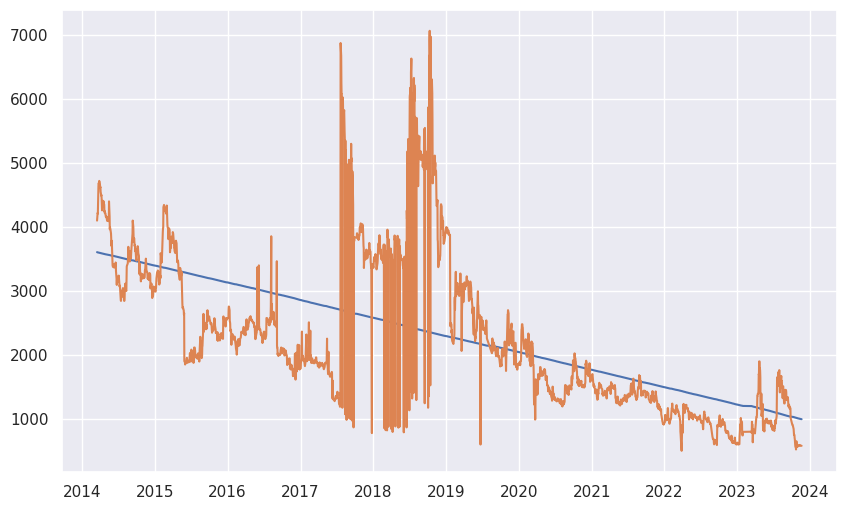

In [ ]:
# 시계열 차트 (선형 휘귀)
plt.plot(df5["Date"],fit_fn(x))
plt.plot(df5["Date"],df5["Close"])
plt.show()

#막대기가 거의 떨어진 것을 볼 수 있음
#주식이 하락할 예정

In [ ]:
**- 마치며

# - Volume 분포가 다른 데이터 분포보다 낮음
# - Heatmap에서는 Open,  High, Low 값이 비슷함
# - Networkx를 통해 Close, Open, High, Lowe이 Volume에 속하는 것을 알 수 있음
# - Backtesting으로 전략을 해 본 결과, 수익률이 332%으로 나왔음
# - AutoTS를 통해 KOSPI 주식이 떨어질 전망
# - “지난주 코스피 지수는 전주 대비 98.64포인트(3.93%) 내린 2409.41을 기록했다. 지수는 잭슨홀 미팅 여파와 반발 매수 영향에 등락을 반복하다 결국 2400선까지 후퇴했다. 원·달러 환율이 금융위기 이후 처음으로 1360원대를 돌파하는 등 원화 약세가 심화하자 기관과 외국인이 매물을 쏟아내면서 지수 하락을 부추겼다.” (한경 코리아마켓)
# - “5일 한국거래소에 따르면 지난주 코스피지수는 전주 대비 2.89%(71.62포인트) 하락한 2409.41에, 코스닥지수는 2.06%(16.57포인트) 내린 785.88에 거래를 마쳤다. ” (뉴데일리 경제)
# - AutoTS가 미래 KOSPI  전망을 맞추는 것을 정말 신기함
